<a href="https://colab.research.google.com/github/goswamimohit/Housing-/blob/main/Housing_EDA1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Important Librarires 

In [30]:
import matplotlib
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
%matplotlib inline

# **Load the dataset into pandas and get a peek at the underlying data in the dataframe.**

In [3]:
name=['CRIM', 'ZN', 'INDUS', 'CHAS' ,'NOX' , 'RM' ,'AGE' ,'DIS', 'RAD','TAX' ,'PTRATIO' ,'B' ,'LSTAT' ,'MEDV' ]
housing = pd.read_csv('/content/housing.csv',names=name,delimiter=r"\s+")

# **Dimensions of the dataframe**

In [4]:
housing.shape

(506, 14)

# **Information about the schema**



> Information about the schema


|SNo.| Column |  Non-Null Count | Dtype | Info| 
|---  | ------ |   --------------|  ----- | --- | 
|0  | **CRIM**   |  506 non-null  |  float64 |  *per capita crime rate by town* |
| 1 |  **ZN**    |   506 non-null |   float64 |  **proportion of residential land zoned for lots over 25,000 sq.ft.** |
|2  | **INDUS**   | 506 non-null  |  float64 | ***proportion of non-retail business acres per town*** |
|3  | **CHAS**    | 506 non-null   | category | **Charles River dummy variable (= 1 if tract bounds river; 0 otherwise**  |
 |4  | **NOX**    |  506 non-null  |  float64 |**nitric oxides concentration (parts per 10 million)** **bold text** |
 |5  | **RM**     |  506 non-null   | float64 | *average number of rooms per dwelling* |
 |6  | **AGE**    |  506 non-null   | float64 | *proportion of owner-occupied units built prior to 1940* |
 |7  | **DIS**    |  506 non-null   | float64 | *weighted distances to five Boston employment centres* |
 |8  | **RAD**    | 506 non-null    |category |  ***index of accessibility to radial highways***  |
 | 9  | **TAX**    |  506 non-null   | float64 |*full-value property-tax rate per $10,000*  |
 | 10 | **PTRATIO** | 506 non-null    |float64 |*pupil-teacher ratio by town*  |
 | 11 | **B**       | 506 non-null   | float64 | *1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town* |
|  12 |**LSTAT**   | 506 non-null    |float64 |*% lower status of the population*  |
|13  |**MEDV**     |506 non-null    |float64 | ***median price (Target)***|


In [123]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype   
---  ------   --------------  -----   
 0   CRIM     506 non-null    float64 
 1   ZN       506 non-null    float64 
 2   INDUS    506 non-null    float64 
 3   CHAS     506 non-null    category
 4   NOX      506 non-null    float64 
 5   RM       506 non-null    float64 
 6   AGE      506 non-null    float64 
 7   DIS      506 non-null    float64 
 8   RAD      506 non-null    category
 9   TAX      506 non-null    float64 
 10  PTRATIO  506 non-null    float64 
 11  B        506 non-null    float64 
 12  LSTAT    506 non-null    float64 
 13  MEDV     506 non-null    float64 
dtypes: category(2), float64(12)
memory usage: 49.0 KB


# **Statistical metrics of each column**

In [72]:
col=['RAD','CHAS']
housing[col]=housing[col].astype('category')

In [73]:
housing.describe().round(1)

,CRIM,ZN,INDUS,NOX,RM,AGE,DIS,TAX,PTRATIO,B,LSTAT,MEDV
count,506.0,506.0,506.0,506.0,506.0,506.0,506.0,506.0,506.0,506.0,506.0,506.0
mean,3.6,11.4,11.1,0.6,6.3,68.6,3.8,408.2,18.5,356.7,12.7,22.5
std,8.6,23.3,6.9,0.1,0.7,28.1,2.1,168.5,2.2,91.3,7.1,9.2
min,0.0,0.0,0.5,0.4,3.6,2.9,1.1,187.0,12.6,0.3,1.7,5.0
25%,0.1,0.0,5.2,0.4,5.9,45.0,2.1,279.0,17.4,375.4,7.0,17.0
50%,0.3,0.0,9.7,0.5,6.2,77.5,3.2,330.0,19.0,391.4,11.4,21.2
75%,3.7,12.5,18.1,0.6,6.6,94.1,5.2,666.0,20.2,396.2,17.0,25.0
max,89.0,100.0,27.7,0.9,8.8,100.0,12.1,711.0,22.0,396.9,38.0,50.0


In [74]:
housing.describe(include='category')

,CHAS,RAD
count,506,506
unique,2,9
top,0,24
freq,471,132


# **Missing values**

In [5]:
housing.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

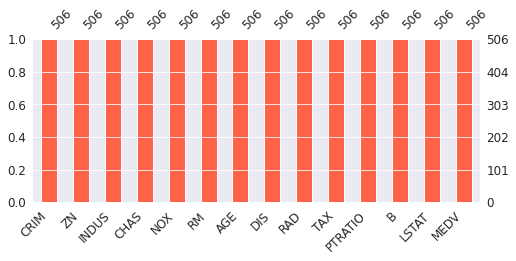

In [75]:
msno.bar(housing,color='tomato', figsize=(8,3), fontsize=12);

# **Erroneous/wrong values**

# **Skewed data**

In [76]:
housing.skew(numeric_only=True).sort_values()

B         -2.890374
PTRATIO   -0.802325
AGE       -0.598963
INDUS      0.295022
RM         0.403612
TAX        0.669956
NOX        0.729308
LSTAT      0.906460
DIS        1.011781
MEDV       1.108098
ZN         2.225666
CRIM       5.223149
dtype: float64

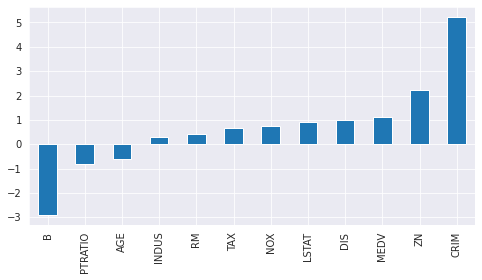

In [77]:
housing.skew(numeric_only=True).sort_values().plot(kind='bar',figsize=(8,4));

# **Outliers**

In [78]:
numericals=housing.select_dtypes(include='number').columns

In [25]:
import warnings
warnings.simplefilter(action="ignore", category=FutureWarning)

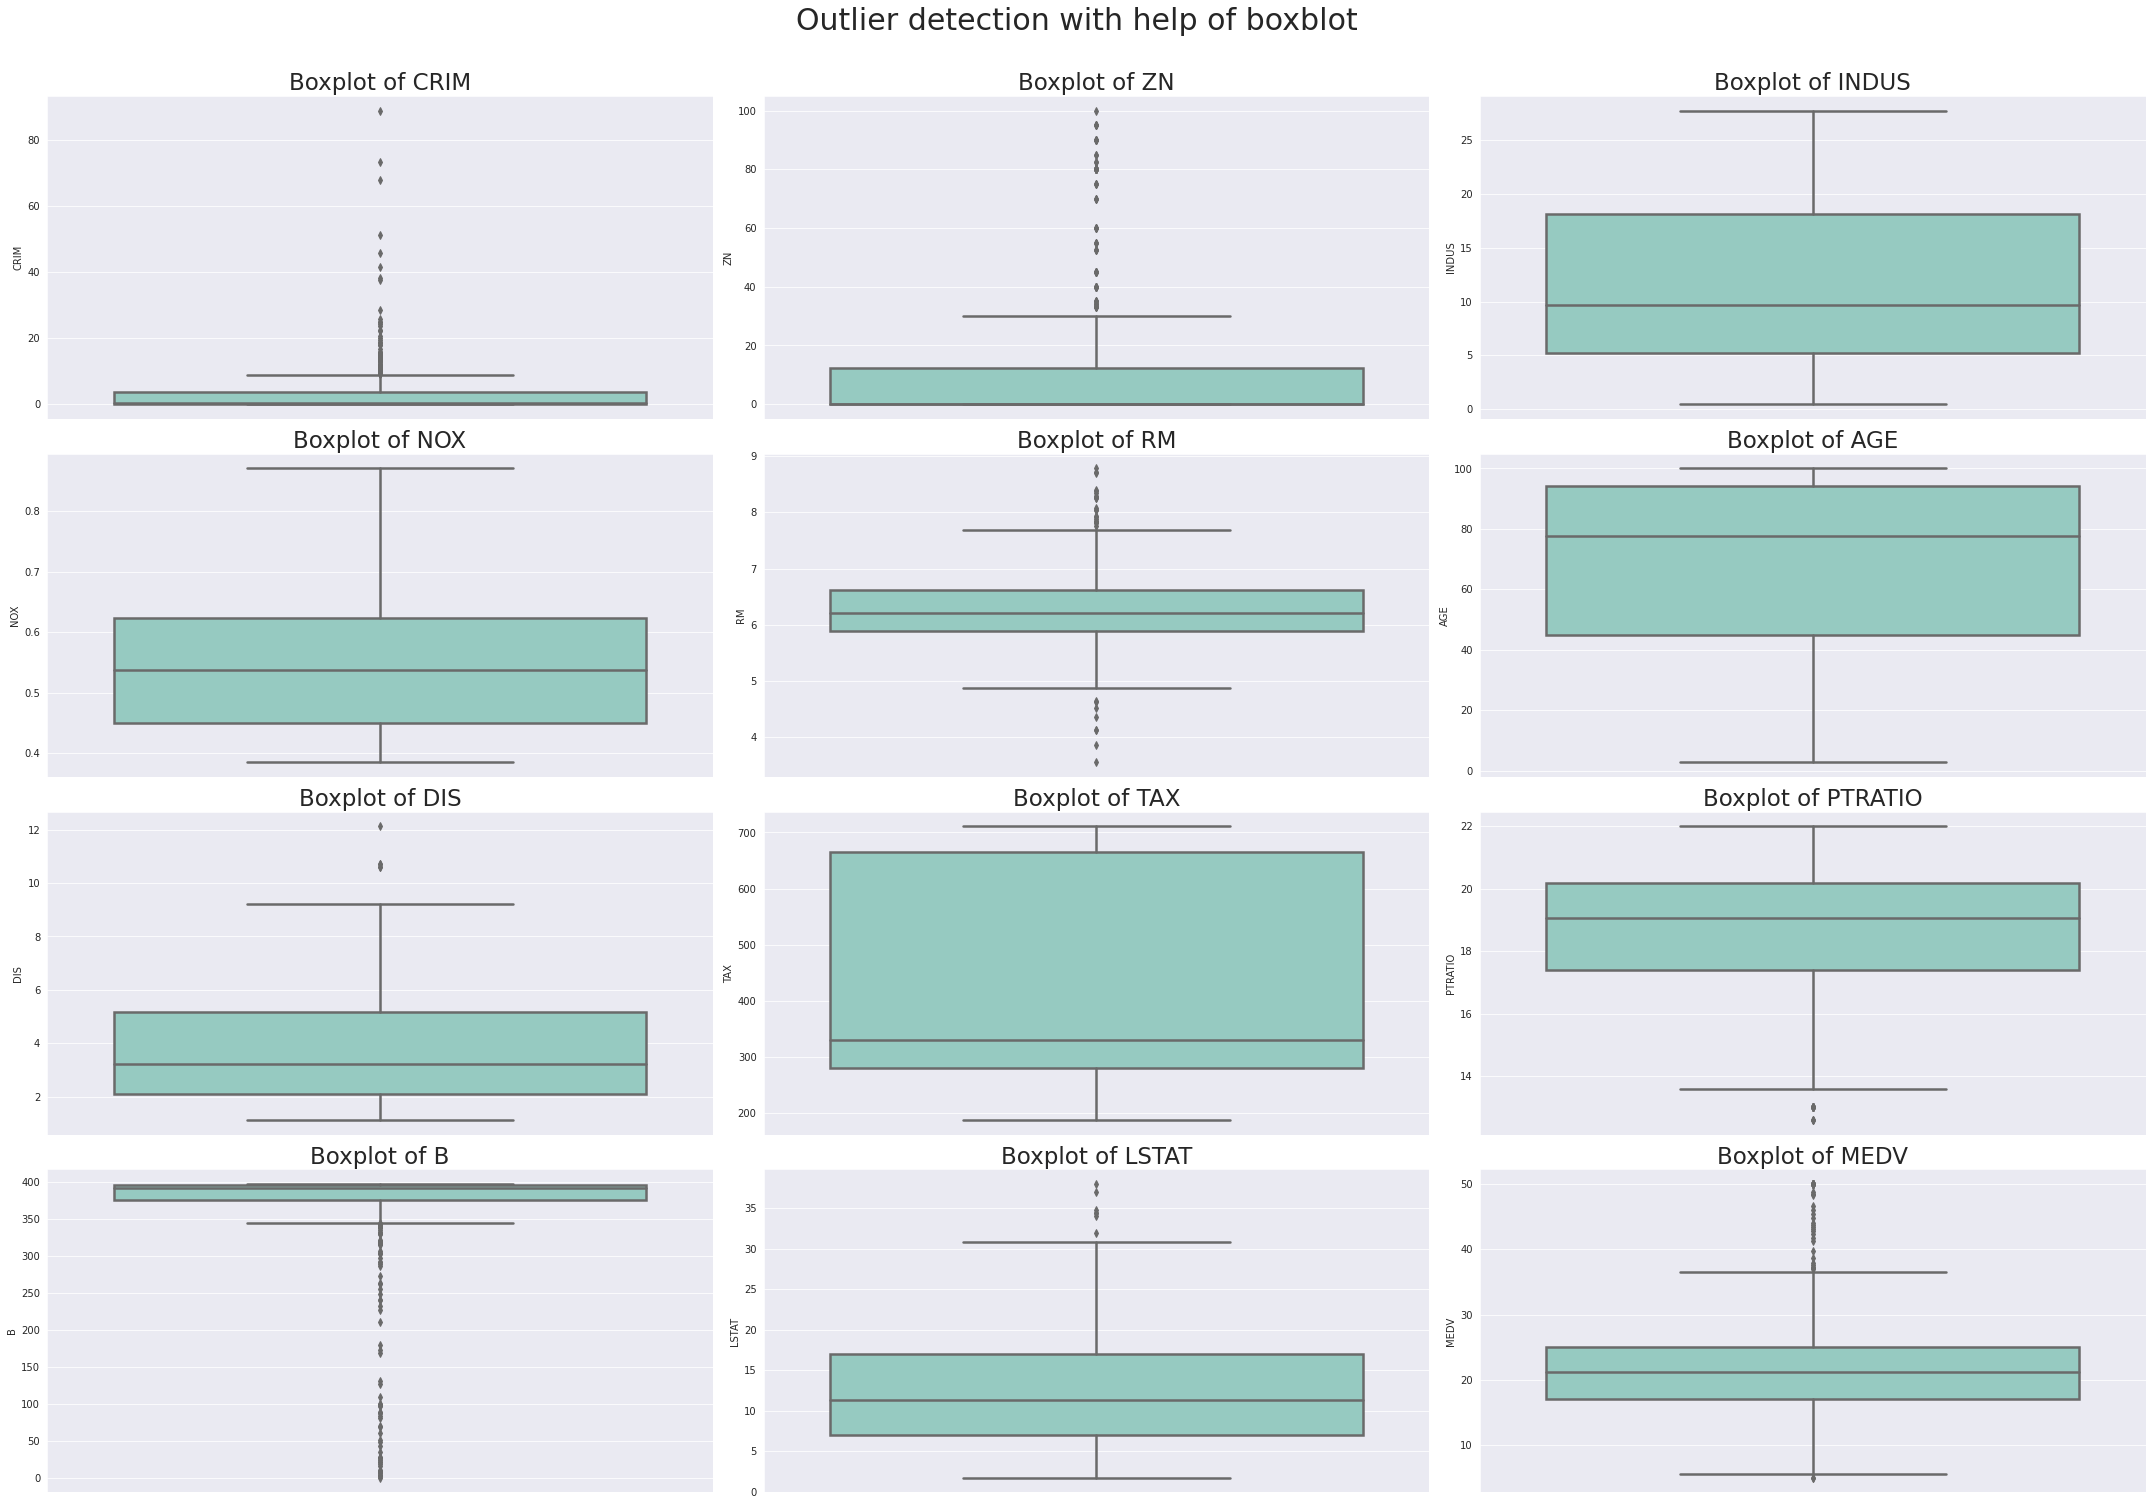

In [79]:
sns.set_style('darkgrid')
count=1
plt.subplots(figsize=(30, 25))
for i in numericals:
    plt.subplot(5,3,count)
    ax = plt.gca()
    sns.boxplot(y=housing[i], palette="Set3", linewidth=2.5,color='r')
    ax.set_title("Boxplot of {}".format(i), fontsize=23)
    count+=1 
    plt.tight_layout()
# plt.suptitle("Outlier detection with help of boxblot", size=25)
plt.suptitle('Outlier detection with help of boxblot', y=1.03, fontsize=30)

plt.show()

# **Distribution of numerical variables**

In [122]:
sns.color_palette("flare", as_cmap=True);

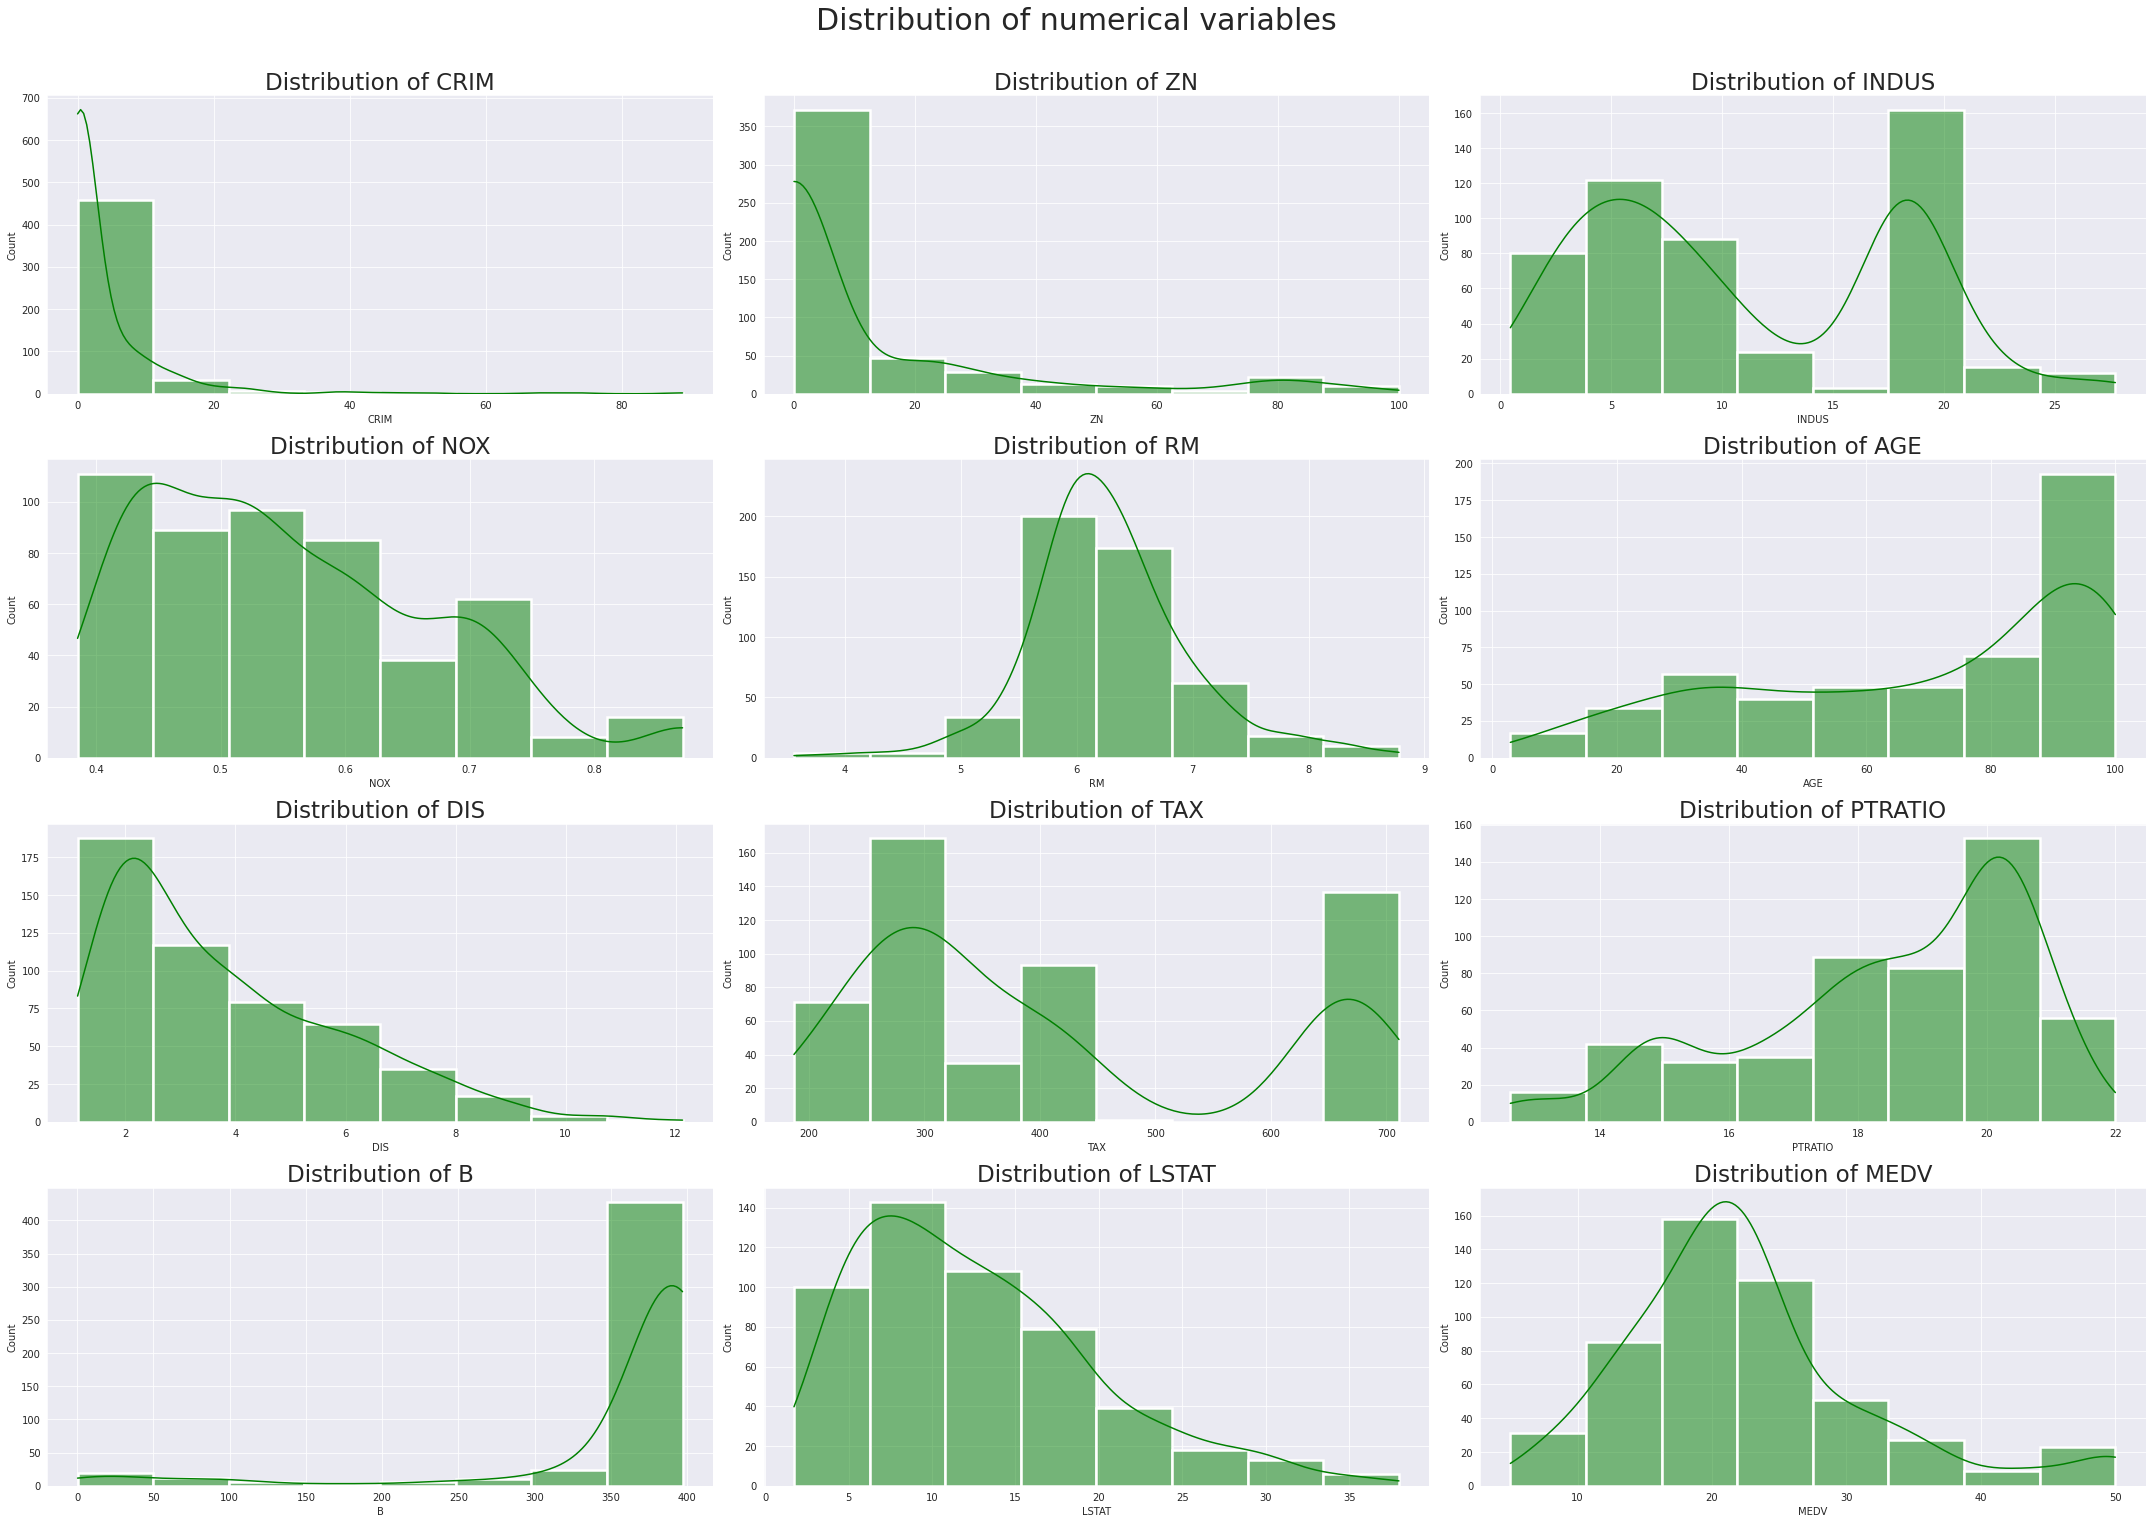

In [80]:
sns.set_style('darkgrid')
count=1
plt.subplots(figsize=(30, 25))
for i in numericals:
    plt.subplot(5,3,count)
    ax = plt.gca()
    sns.histplot(housing[i],kde=True,bins=8, palette="Set2", linewidth=2.5,color='g')
    ax.set_title("Distribution of {}".format(i), fontsize=23)
    count+=1 
    plt.tight_layout()
# plt.suptitle("Outlier detection with help of boxblot", size=25)
plt.suptitle('Distribution of numerical variables', y=1.03, fontsize=30)
plt.show()

# **Distribution of categorical variables**

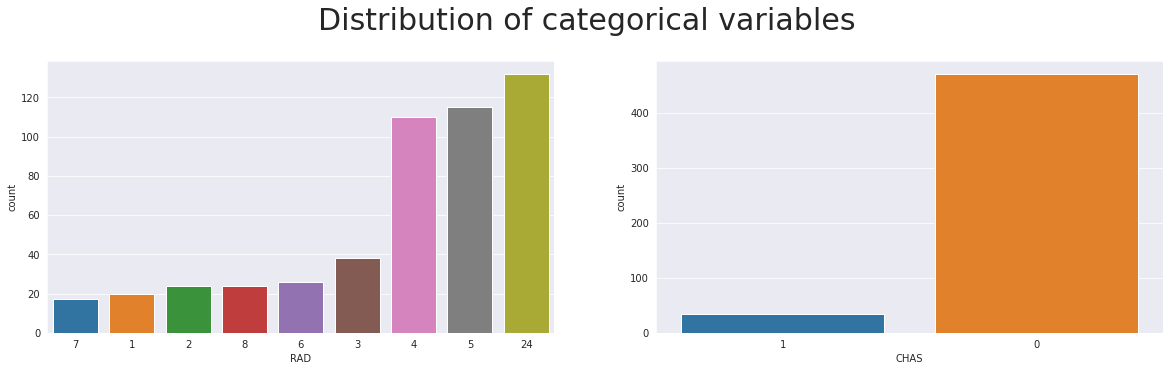

In [86]:
plt.rcParams["figure.figsize"] = (20,5)
f, axes = plt.subplots(1, 2)
RAD = housing['RAD']
sns.countplot(x= RAD ,data =housing,orient='v',order=RAD.value_counts().sort_values().index, ax=axes[0])#box plot fot sex column
CHAS = housing['CHAS']
sns.countplot(x= CHAS ,data =housing,order=CHAS.value_counts().sort_values().index,orient='v', ax=axes[1]);#box plot fot job column
plt.suptitle('Distribution of categorical variables', y=1.03, fontsize=30)
plt.show()

# **Numerical vs Categorical plots**

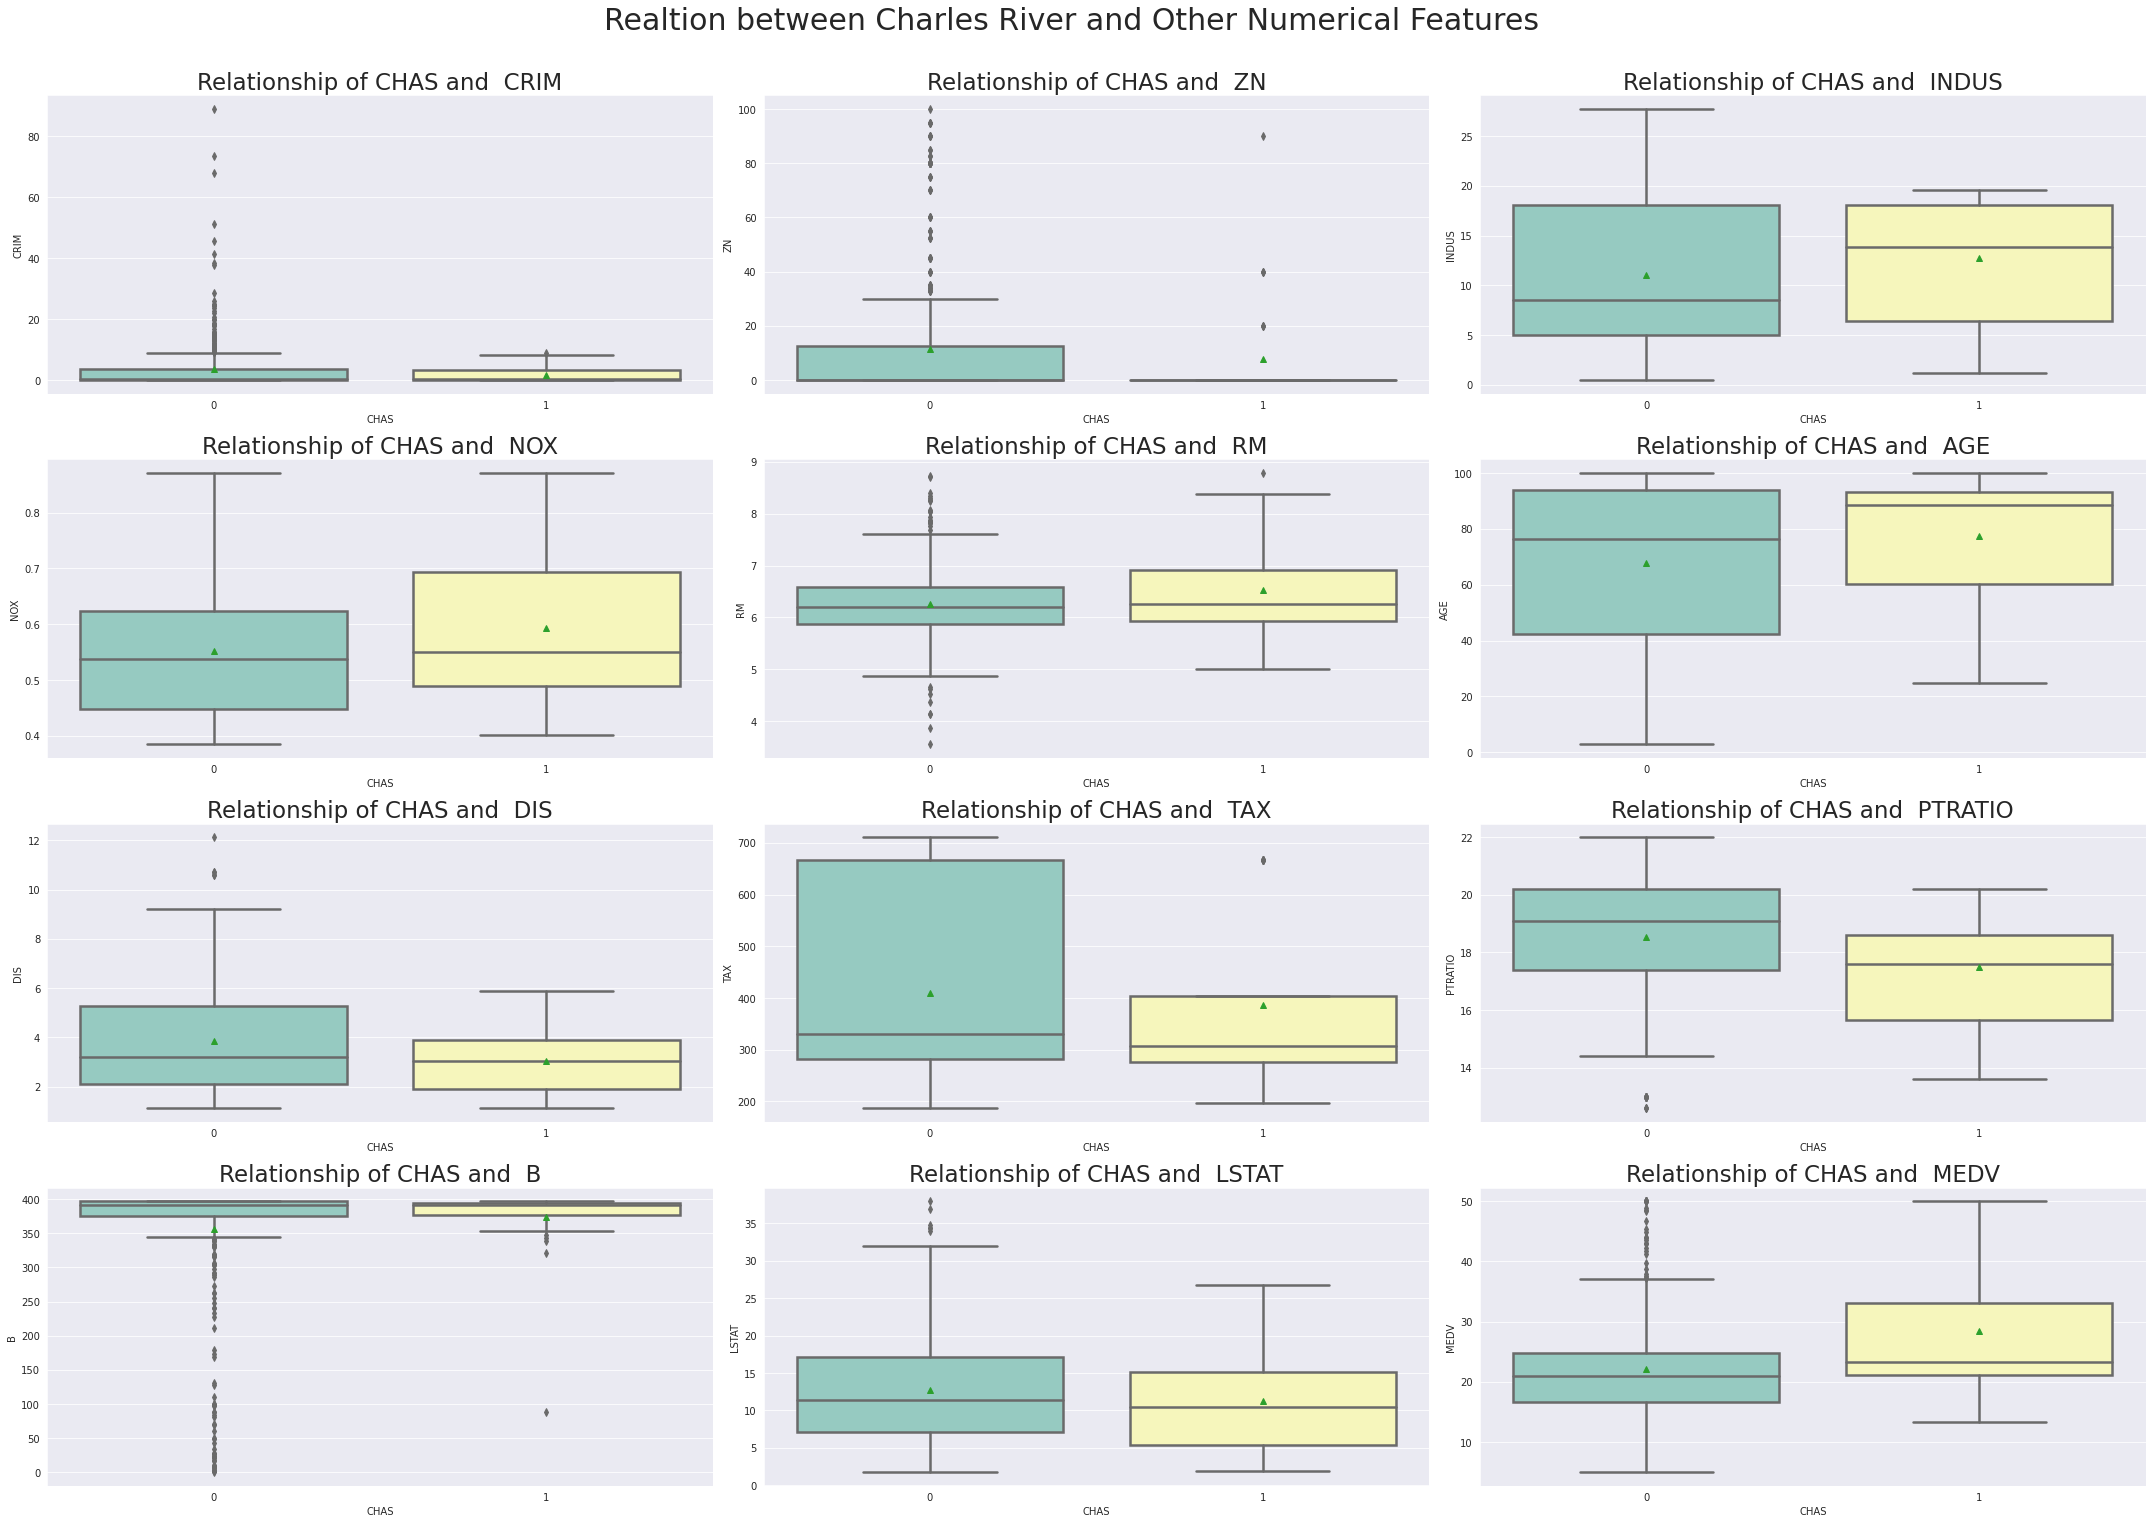

In [98]:
sns.set_style('darkgrid')
CHAS = housing['CHAS']
count=1
plt.subplots(figsize=(30, 25))
for i in numericals:
    plt.subplot(5,3,count)
    ax = plt.gca()
    sns.boxplot(y=housing[i],x=CHAS, palette="Set3", linewidth=2.5,color='r',showmeans=True)
    ax.set_title("Relationship of CHAS and  {}".format(i), fontsize=23)
    count+=1 
    plt.tight_layout()
# plt.suptitle("Outlier detection with help of boxblot", size=25)
plt.suptitle('Realtion between Charles River and Other Numerical Features ', y=1.03, fontsize=30)

plt.show()

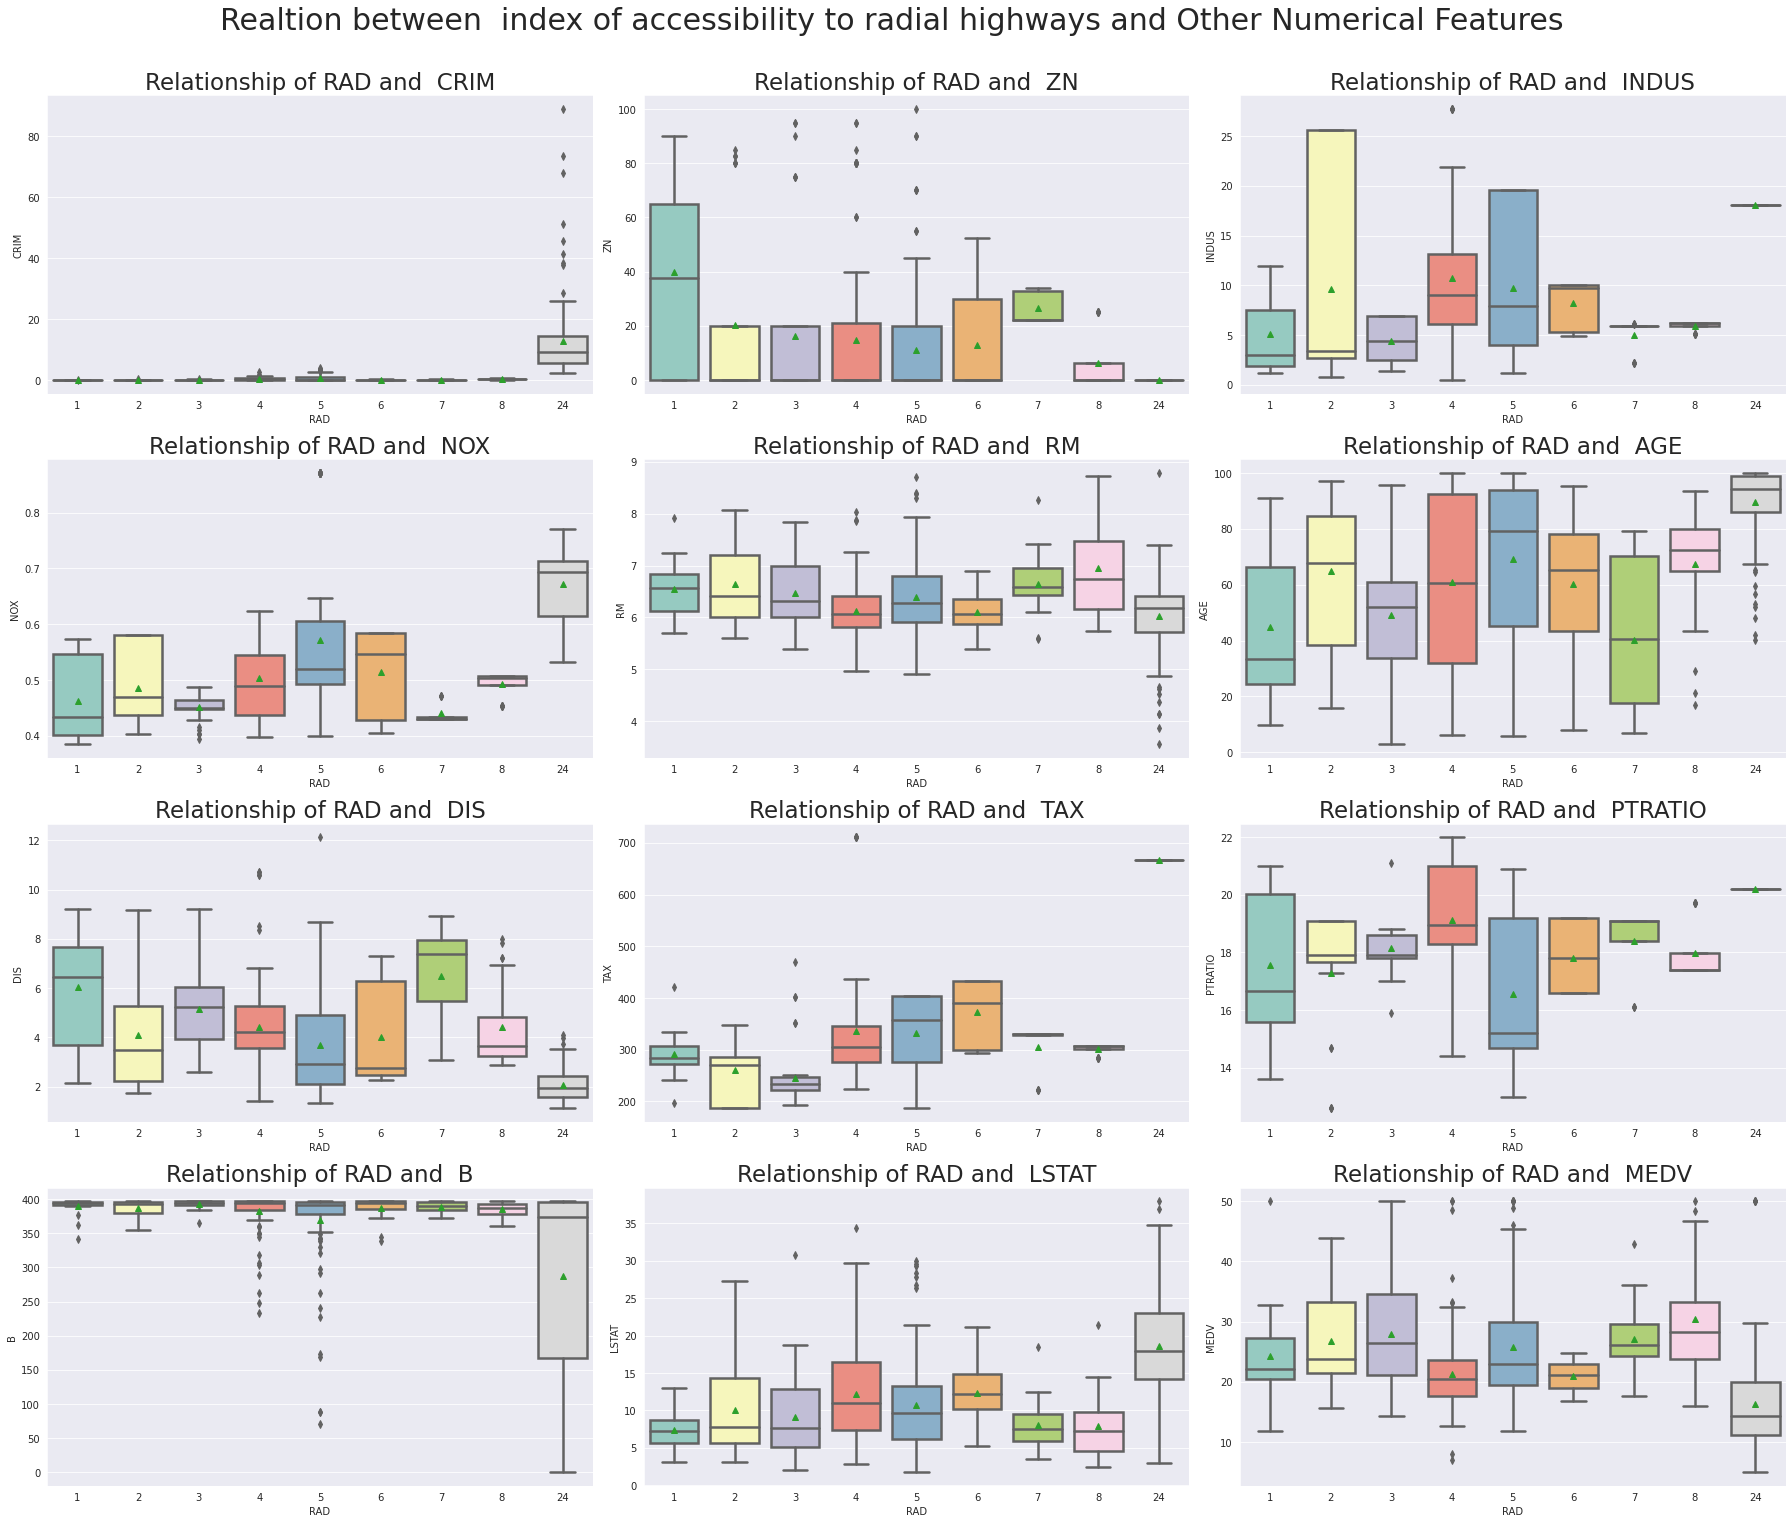

In [103]:
sns.set_style('darkgrid')
RAD = housing['RAD']
count=1
plt.subplots(figsize=(25, 25))
for i in numericals:
    plt.subplot(5,3,count)
    ax = plt.gca()
    sns.boxplot(y=housing[i],x=RAD, palette="Set3", linewidth=2.5,color='r',showmeans=True)
    ax.set_title("Relationship of RAD and  {}".format(i), fontsize=23)
    count+=1 
    plt.tight_layout()
# plt.suptitle("Outlier detection with help of boxblot", size=25)
plt.suptitle('Realtion between  index of accessibility to radial highways and Other Numerical Features ', y=1.03, fontsize=30)

plt.show()

# **Numerical vs Numerical plots**

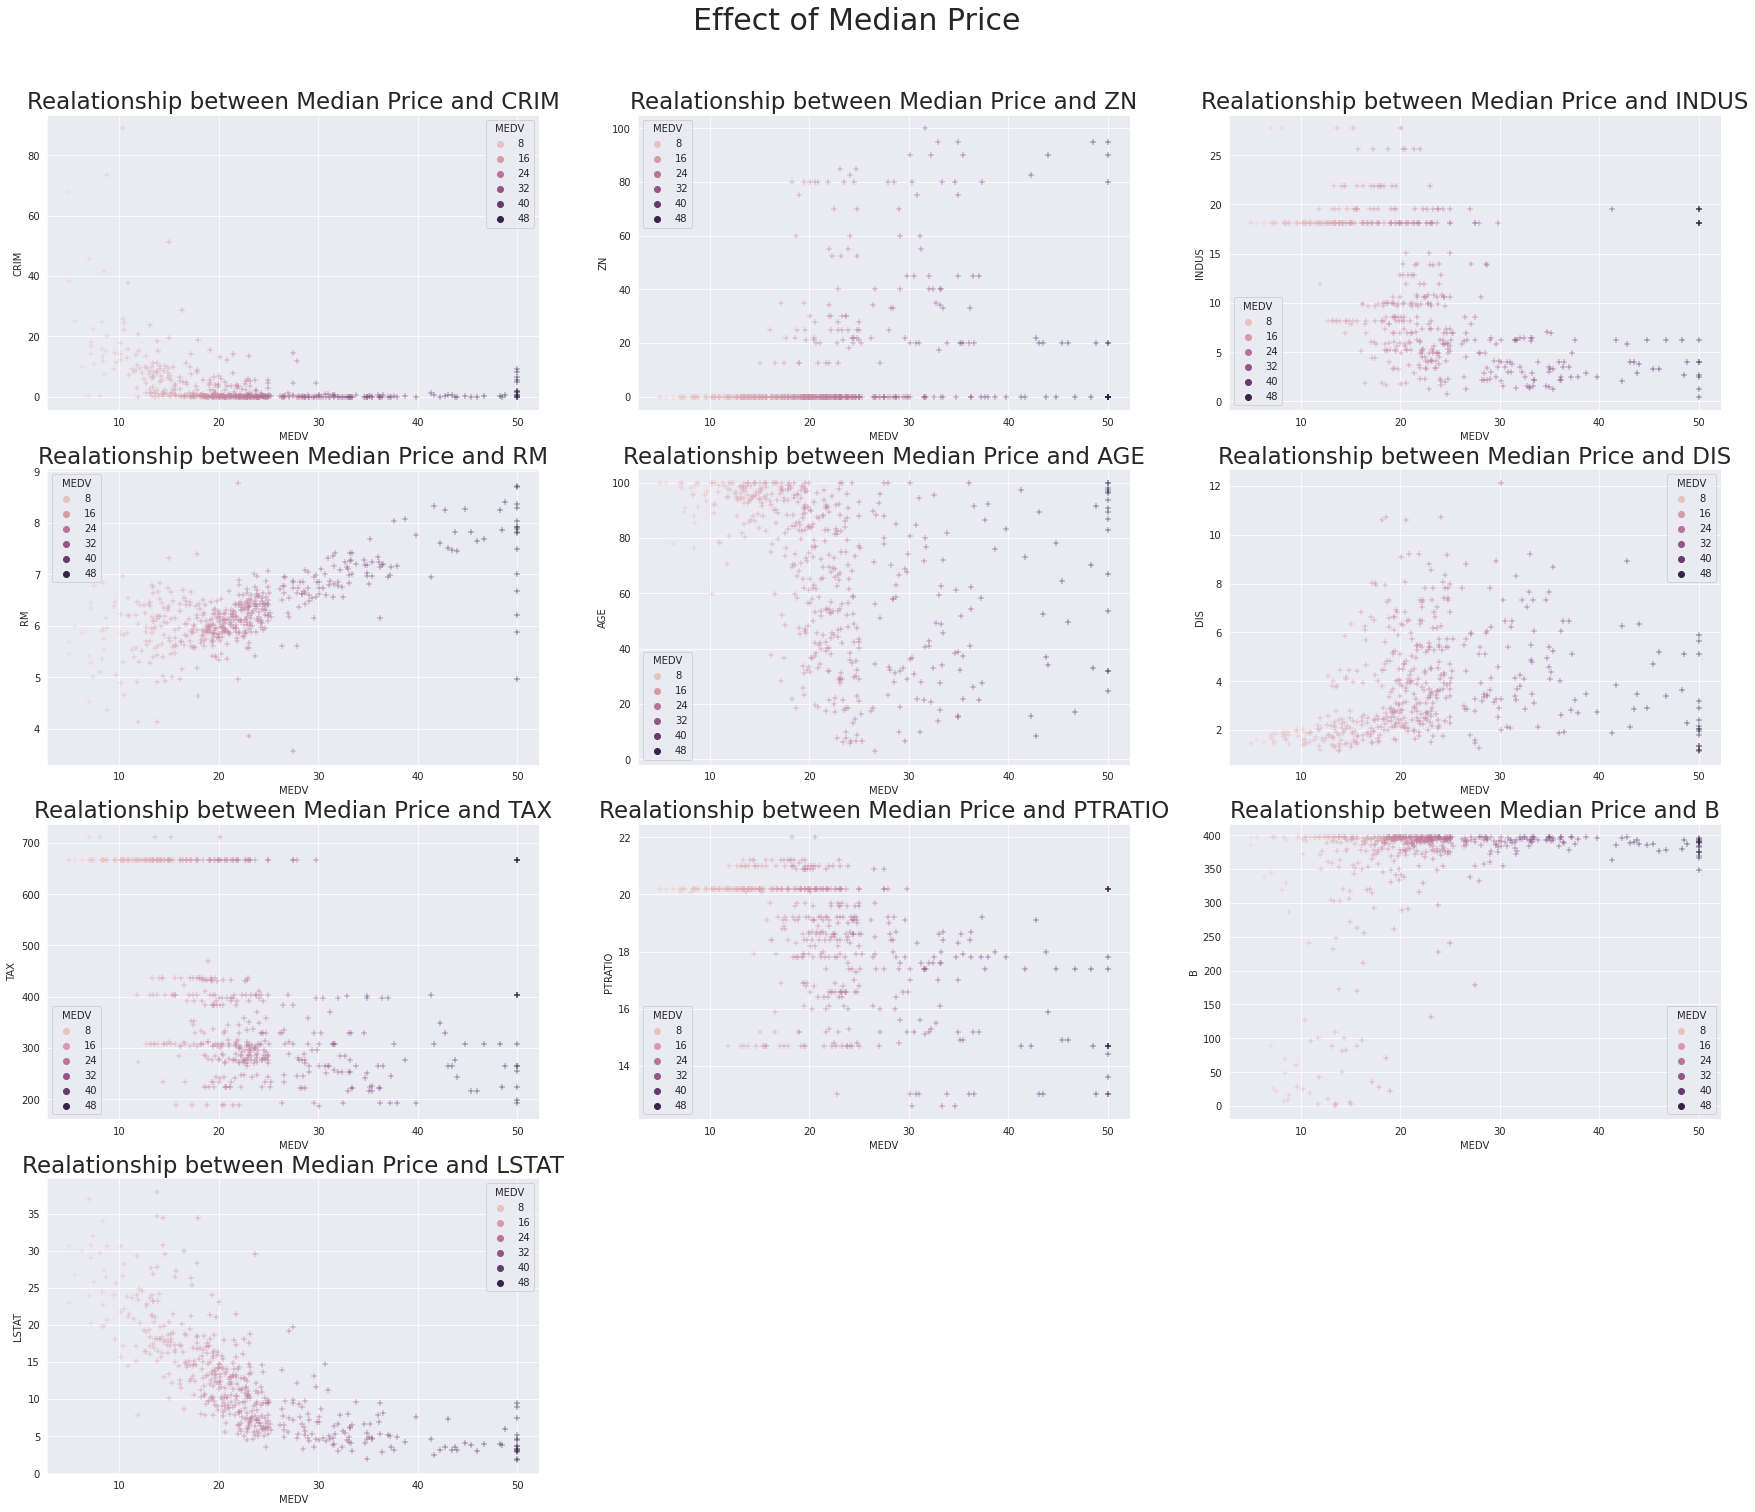

In [121]:
x_col = 'MEDV'
y_columns = ['CRIM', 'ZN', 'INDUS', 'RM', 'AGE', 'DIS', 'TAX', 'PTRATIO', 'B','LSTAT']
count=1
plt.subplots(figsize=(30, 25))
for i in y_columns:
    plt.subplot(4,3,count)
    ax = plt.gca()
    sns.scatterplot(housing[x_col],housing[i],color='r',hue=housing[x_col], marker="+")
    ax.set_xlabel(x_col)
    ax.set_ylabel(i)
    ax.set_title("Realationship between Median Price and {}".format(i), fontsize=23)
    count+=1
plt.suptitle('Effect of Median Price', y=0.94, fontsize=30)
plt.show()

# Affect of Tansformation

In [136]:
housing_tr=housing.copy(deep=True)

In [126]:
from scipy.stats import boxcox

In [137]:
for c in housing_tr.select_dtypes(include = [np.number]).columns:
    housing_tr[c] = np.log(housing_tr[c])

/usr/local/lib/python3.7/dist-packages/pandas/core/arraylike.py:364: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


/usr/local/lib/python3.7/dist-packages/numpy/lib/function_base.py:4009: RuntimeWarning: invalid value encountered in subtract
  diff_b_a = subtract(b, a)


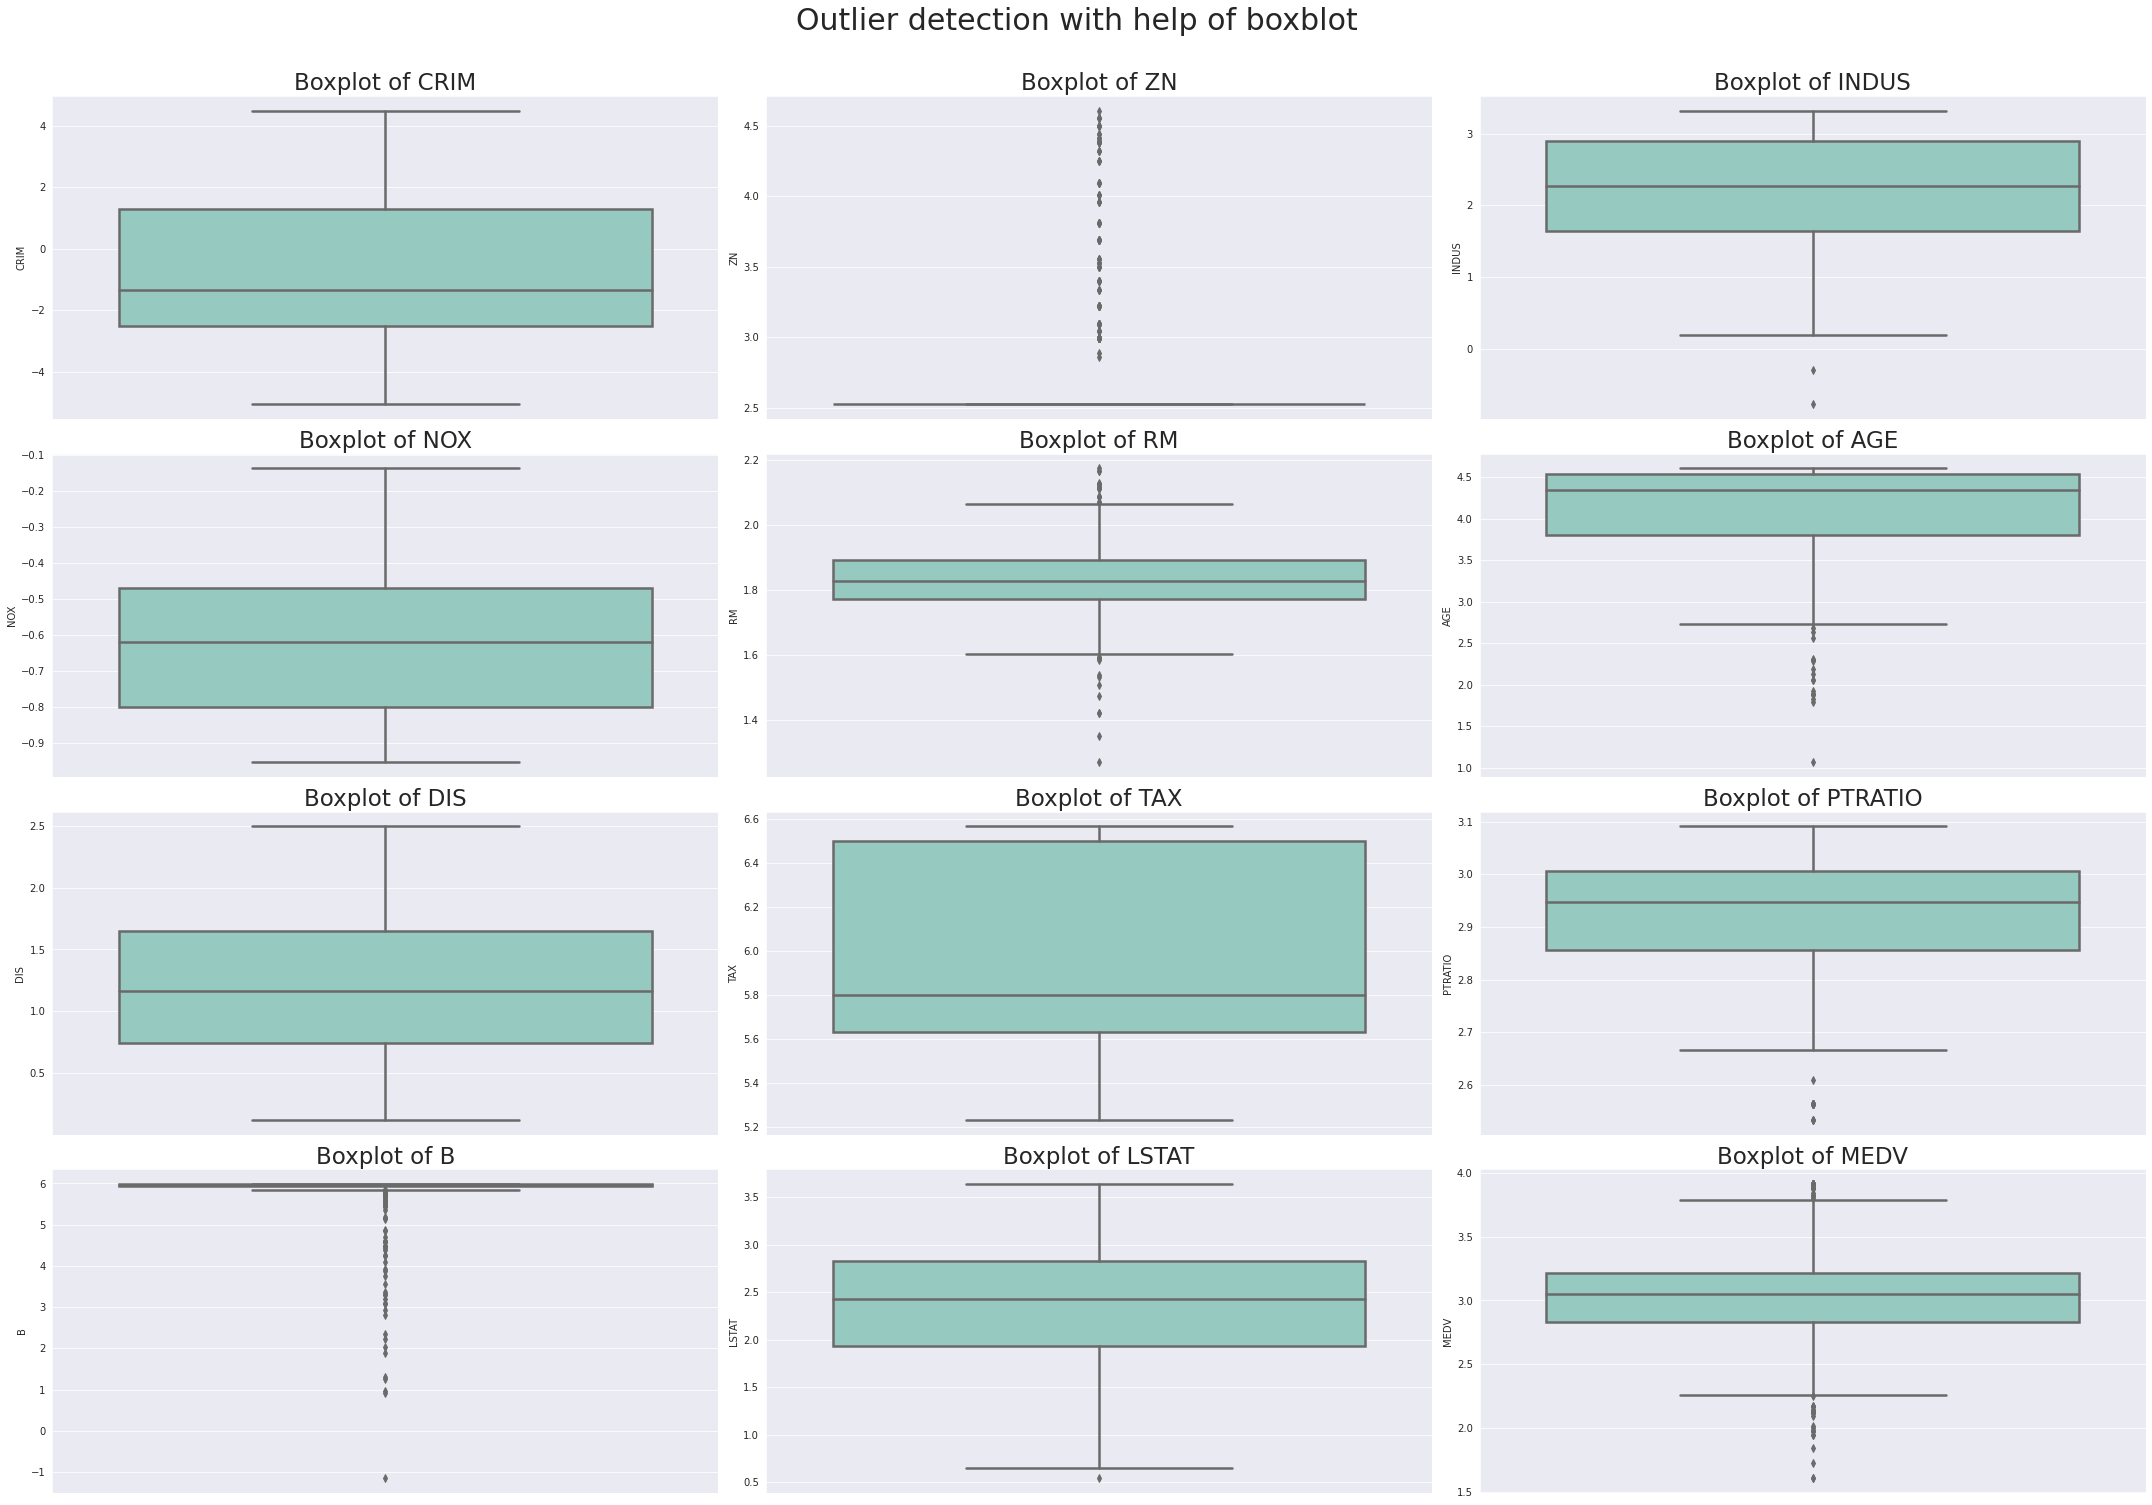

In [138]:
sns.set_style('darkgrid')
count=1
plt.subplots(figsize=(30, 25))
for i in numericals:
    plt.subplot(5,3,count)
    ax = plt.gca()
    sns.boxplot(y=housing_tr[i], palette="Set3", linewidth=2.5,color='r')
    ax.set_title("Boxplot of {}".format(i), fontsize=23)
    count+=1 
    plt.tight_layout()
# plt.suptitle("Outlier detection with help of boxblot", size=25)
plt.suptitle('Outlier detection with help of boxblot', y=1.03, fontsize=30)

plt.show()

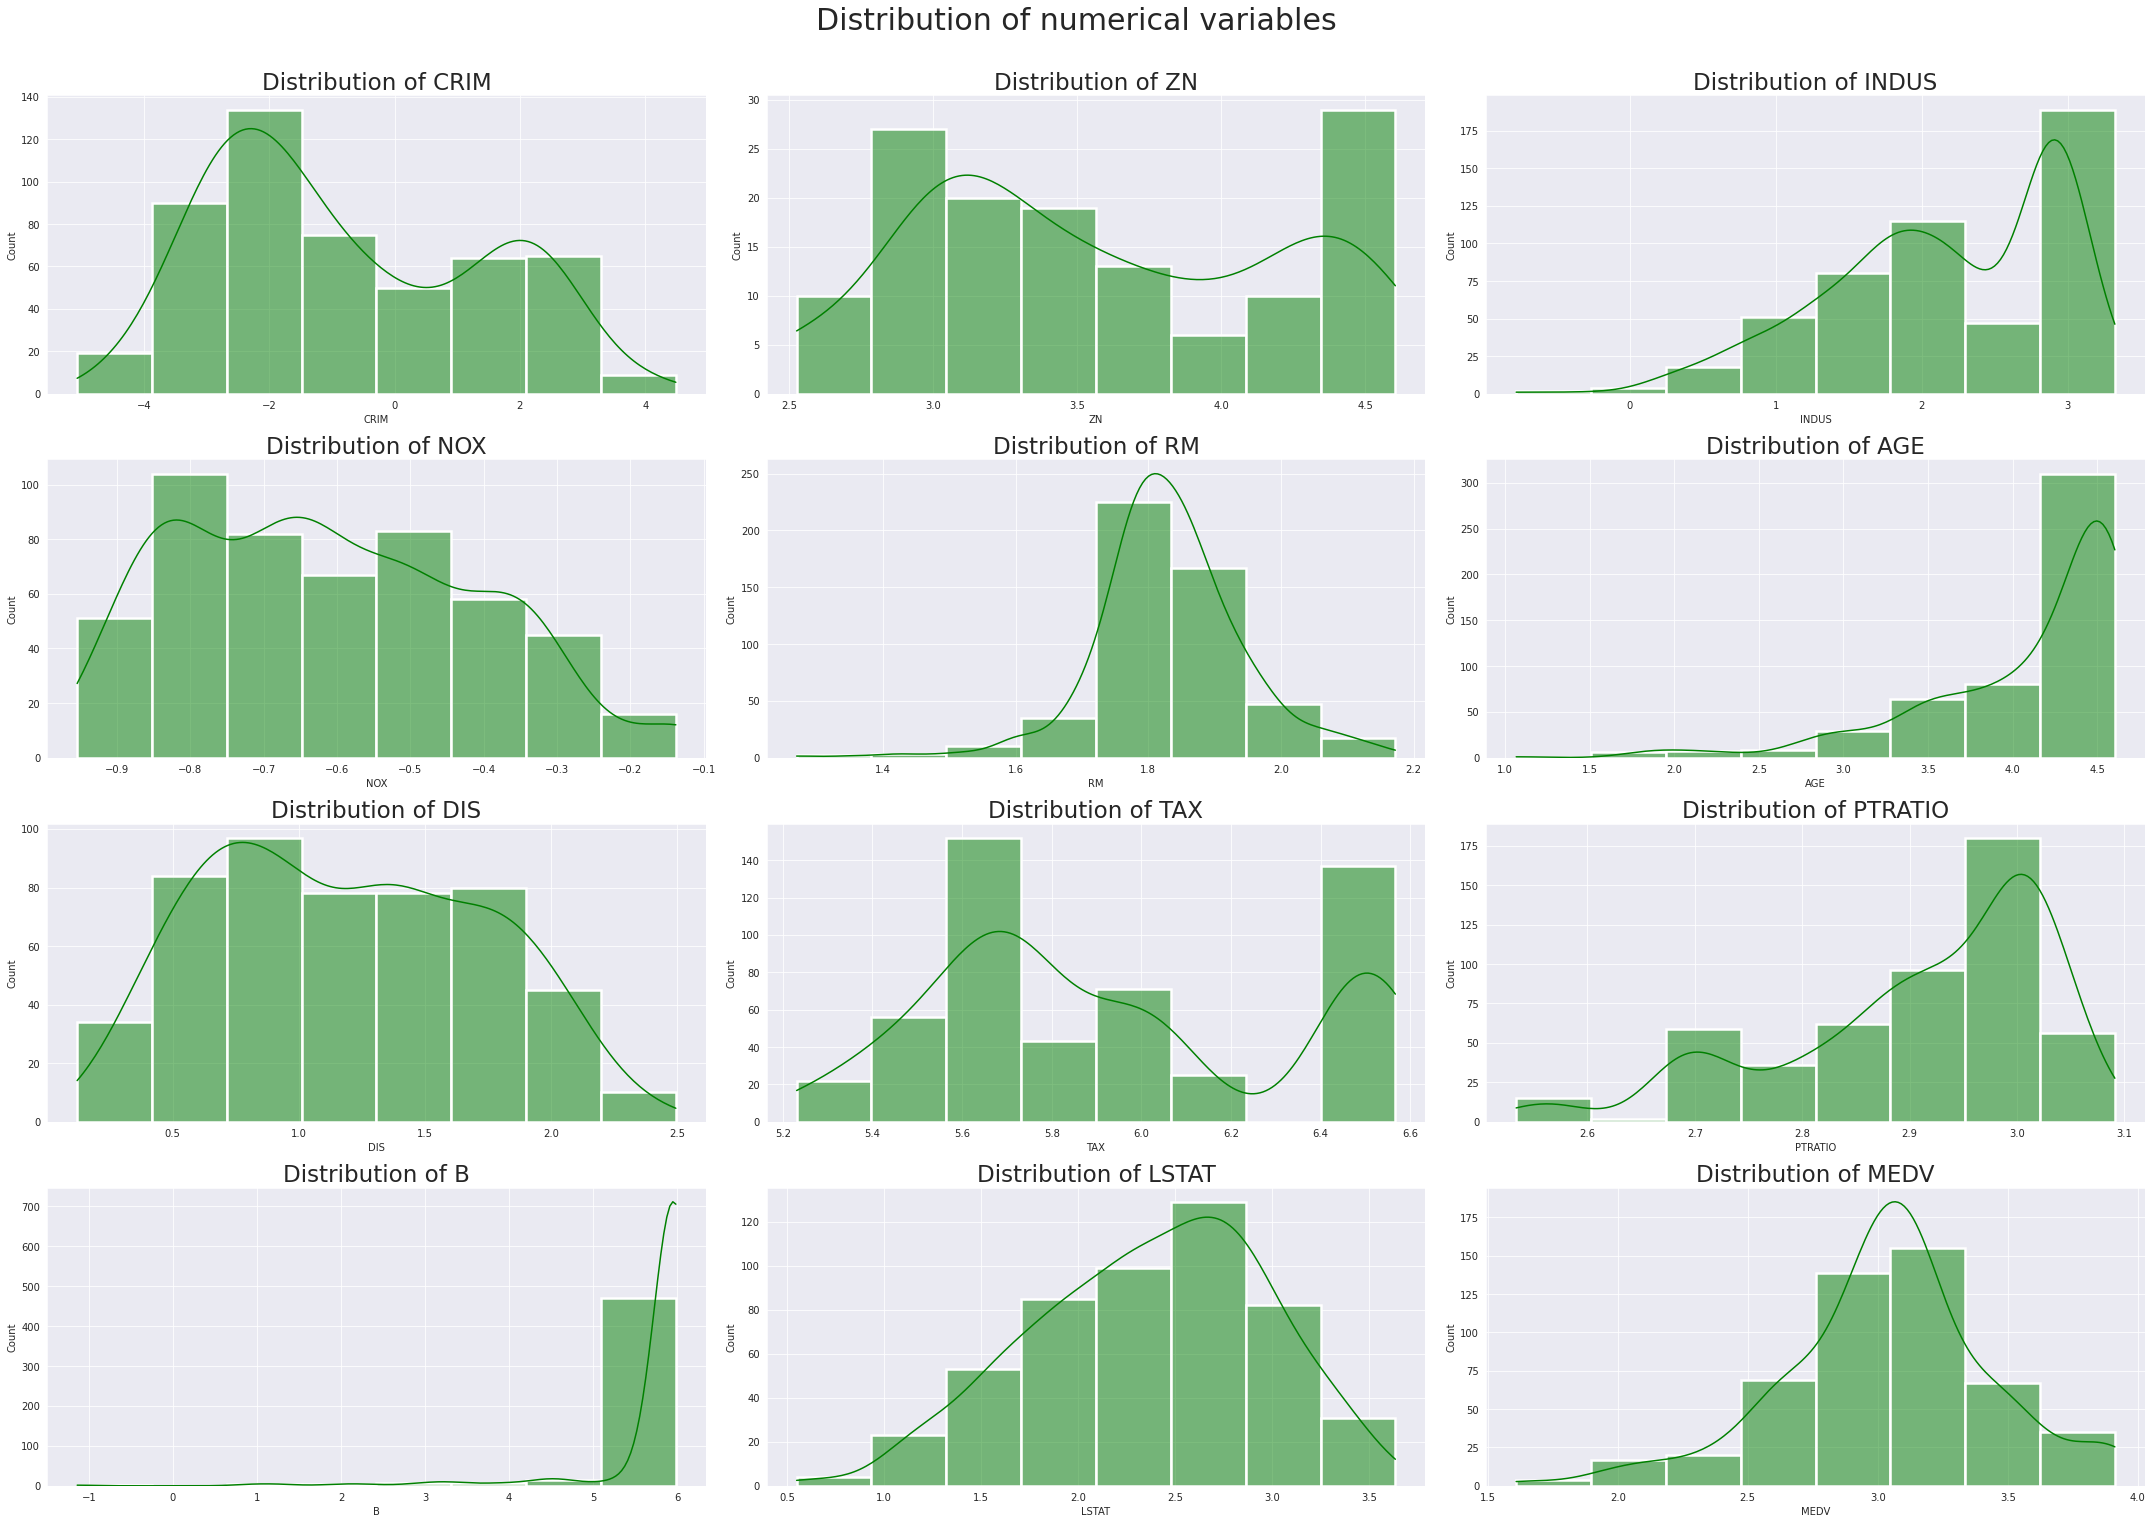

In [139]:
sns.set_style('darkgrid')
count=1
plt.subplots(figsize=(30, 25))
for i in numericals:
    plt.subplot(5,3,count)
    ax = plt.gca()
    sns.histplot(housing_tr[i],kde=True,bins=8, palette="Set2", linewidth=2.5,color='g')
    ax.set_title("Distribution of {}".format(i), fontsize=23)
    count+=1 
    plt.tight_layout()
# plt.suptitle("Outlier detection with help of boxblot", size=25)
plt.suptitle('Distribution of numerical variables', y=1.03, fontsize=30)
plt.show()

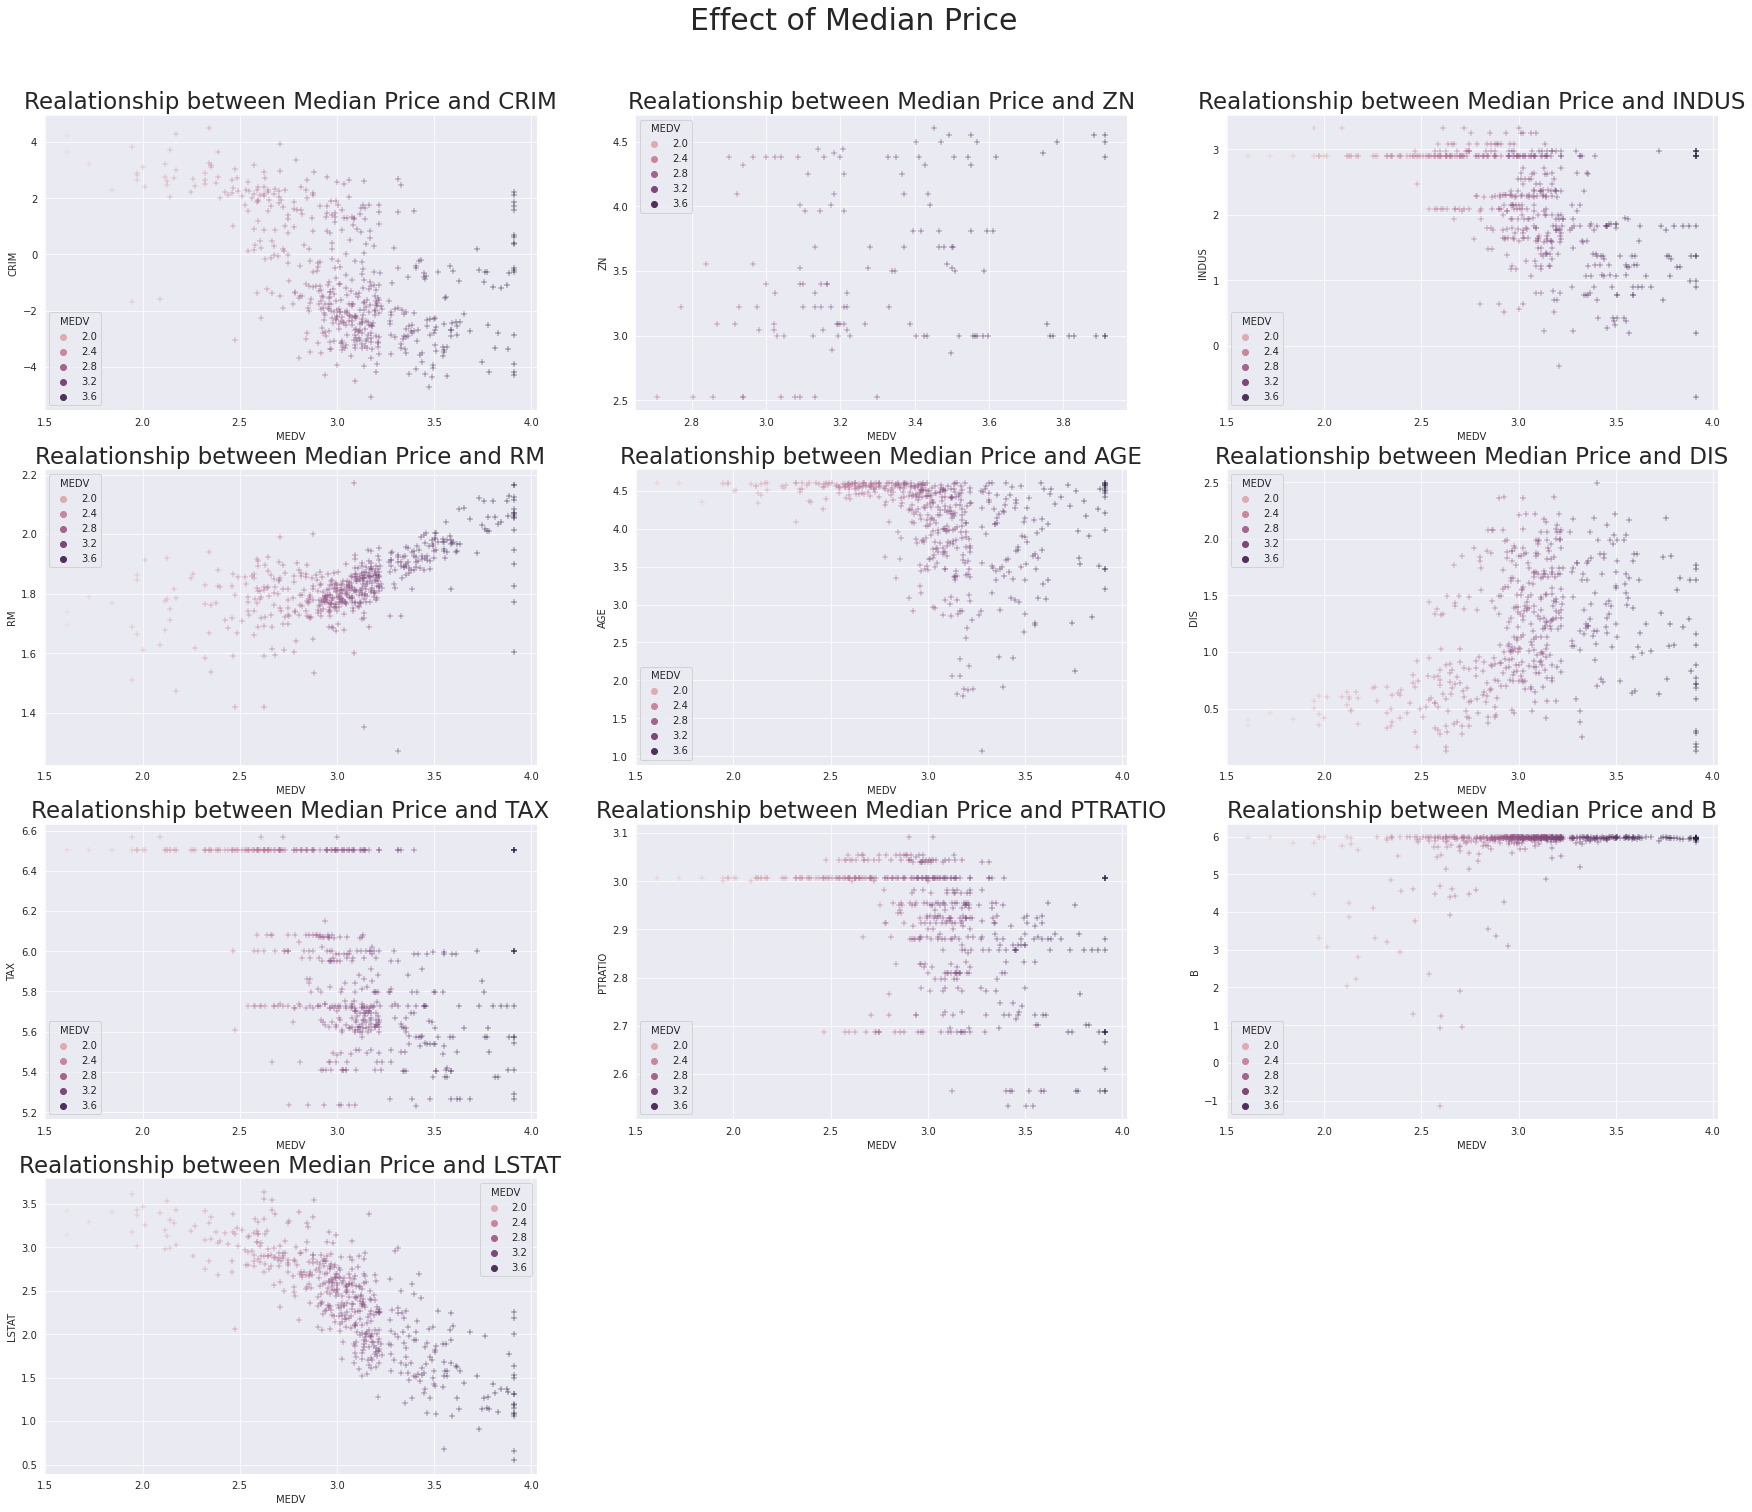

In [140]:
x_col = 'MEDV'
y_columns = ['CRIM', 'ZN', 'INDUS', 'RM', 'AGE', 'DIS', 'TAX', 'PTRATIO', 'B','LSTAT']
count=1
plt.subplots(figsize=(30, 25))
for i in y_columns:
    plt.subplot(4,3,count)
    ax = plt.gca()
    sns.scatterplot(housing_tr[x_col],housing_tr[i],color='r',hue=housing_tr[x_col], marker="+")
    ax.set_xlabel(x_col)
    ax.set_ylabel(i)
    ax.set_title("Realationship between Median Price and {}".format(i), fontsize=23)
    count+=1
plt.suptitle('Effect of Median Price', y=0.94, fontsize=30)
plt.show()

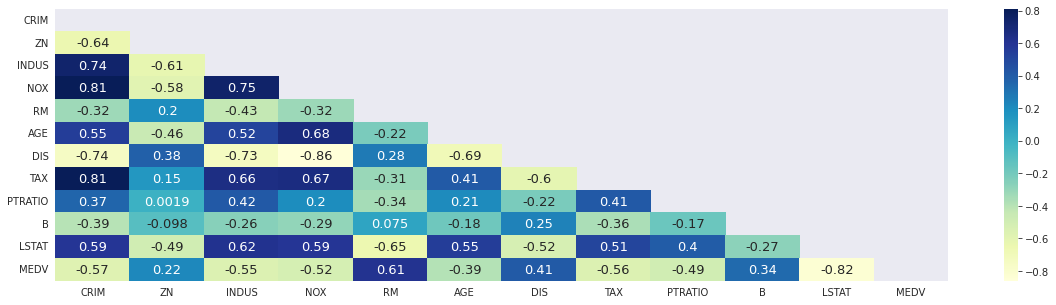

In [141]:
# plotting correlation heatmap
fig, ax = plt.subplots(figsize=(20,5)) 
mask = np.triu(np.ones_like(housing_tr.corr()))
dataplot = sns.heatmap(housing_tr.corr(), cmap="YlGnBu", annot=True,mask=mask,annot_kws={'size': 13},ax=ax)
  
# displaying heatmap
plt.show()

In [146]:
def tansformation (housing_tr):#Script
  sns.set_style('darkgrid')
  count=1
  plt.subplots(figsize=(30, 25))
  for i in numericals:
      plt.subplot(5,3,count)
      ax = plt.gca()
      sns.boxplot(y=housing_tr[i], palette="Set3", linewidth=2.5,color='r')
      ax.set_title("Boxplot of {}".format(i), fontsize=23)
      count+=1 
      plt.tight_layout()
  # plt.suptitle("Outlier detection with help of boxblot", size=25)
  plt.suptitle('Outlier detection with help of boxblot', y=1.03, fontsize=30)

  plt.show()

  sns.set_style('darkgrid')
  count=1
  plt.subplots(figsize=(30, 25))
  for i in numericals:
      plt.subplot(5,3,count)
      ax = plt.gca()
      sns.histplot(housing_tr[i],kde=True,bins=8, palette="Set2", linewidth=2.5,color='g')
      ax.set_title("Distribution of {}".format(i), fontsize=23)
      count+=1 
      plt.tight_layout()
  # plt.suptitle("Outlier detection with help of boxblot", size=25)
  plt.suptitle('Distribution of numerical variables', y=1.03, fontsize=30)
  plt.show()

  x_col = 'MEDV'
  y_columns = ['CRIM', 'ZN', 'INDUS', 'RM', 'AGE', 'DIS', 'TAX', 'PTRATIO', 'B','LSTAT']
  count=1
  plt.subplots(figsize=(30, 25))
  for i in y_columns:
      plt.subplot(4,3,count)
      ax = plt.gca()
      sns.scatterplot(housing_tr[x_col],housing_tr[i],color='r',hue=housing_tr[x_col], marker="+")
      ax.set_xlabel(x_col)
      ax.set_ylabel(i)
      ax.set_title("Realationship between Median Price and {}".format(i), fontsize=23)
      count+=1
  plt.suptitle('Effect of Median Price', y=0.94, fontsize=30)
  plt.show()

  fig, ax = plt.subplots(figsize=(20,5)) 
  mask = np.triu(np.ones_like(housing_tr.corr()))
  dataplot = sns.heatmap(housing_tr.corr(), cmap="YlGnBu", annot=True,mask=mask,annot_kws={'size': 13},ax=ax)
  
  # displaying heatmap
  plt.show()

In [ ]:
def log_transformation(df):
  for c in df.select_dtypes(include = [np.number]).columns:
      df[c] = np.log(df[c])

In [169]:
def remove_outlier_IQR(df):#Outlier Removal BY IQR
    df=df.select_dtypes(include='number')
    Q1=df.quantile(0.25)
    Q3=df.quantile(0.75)
    IQR=Q3-Q1
    df_final=df[~((df<(Q1-1.5*IQR)) | (df>(Q3+1.5*IQR)))]
    return df_final

In [168]:
housing_ol=housing.copy(deep=True)

In [ ]:
remove_outlier_IQR(housing_ol)

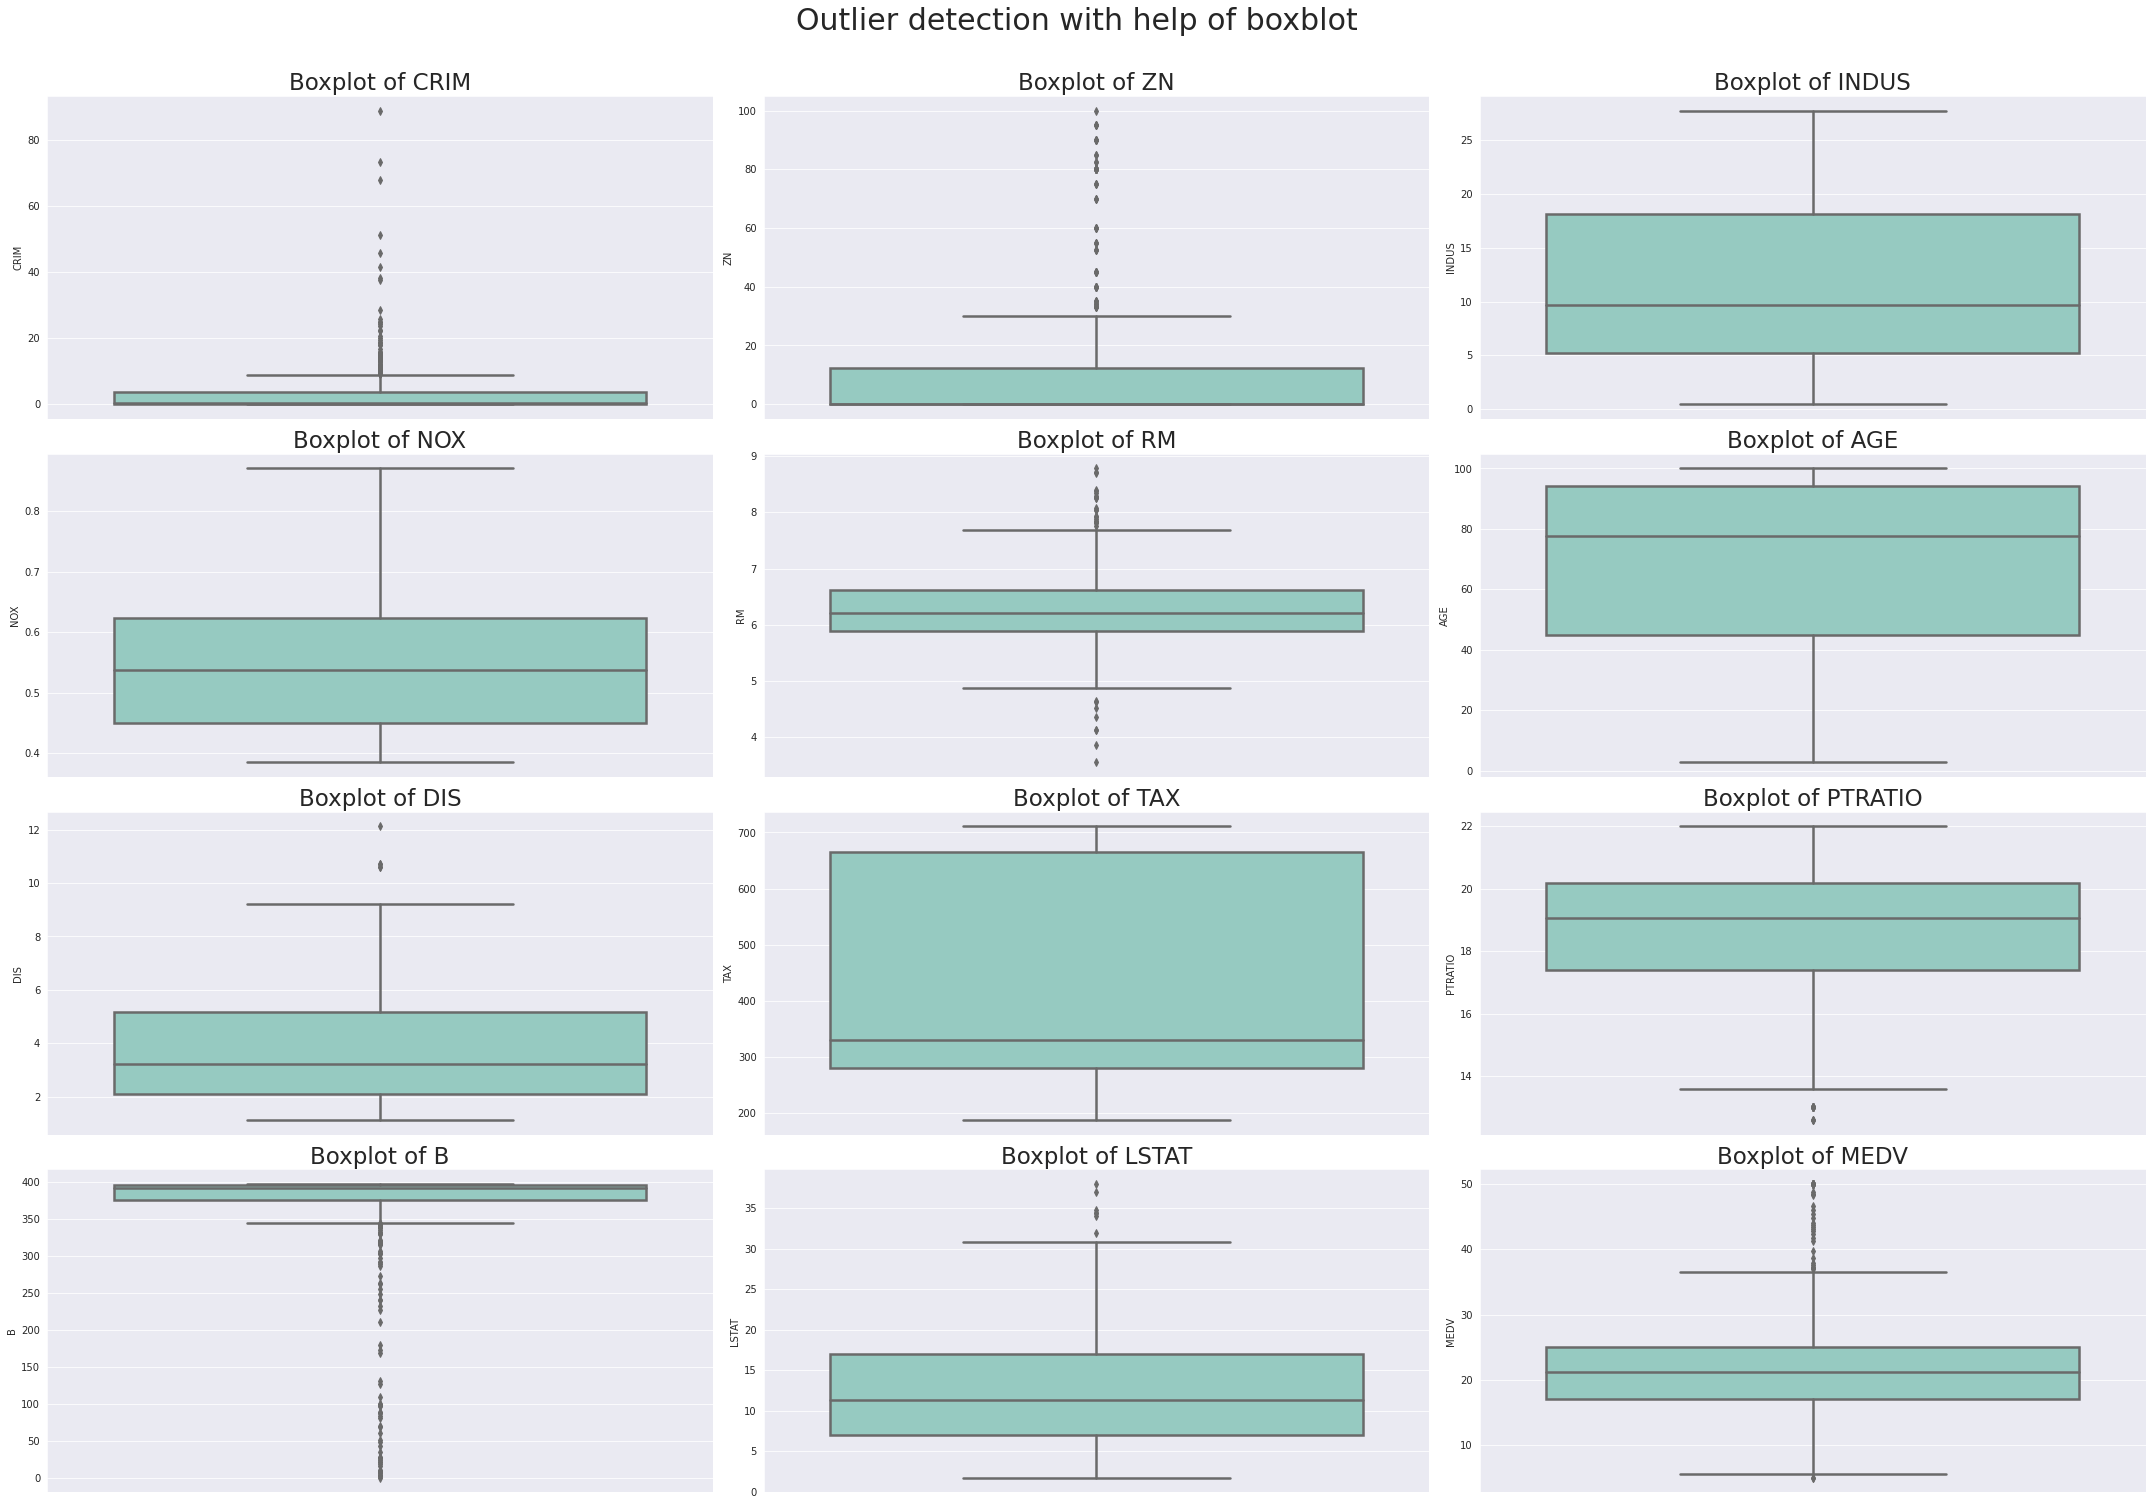

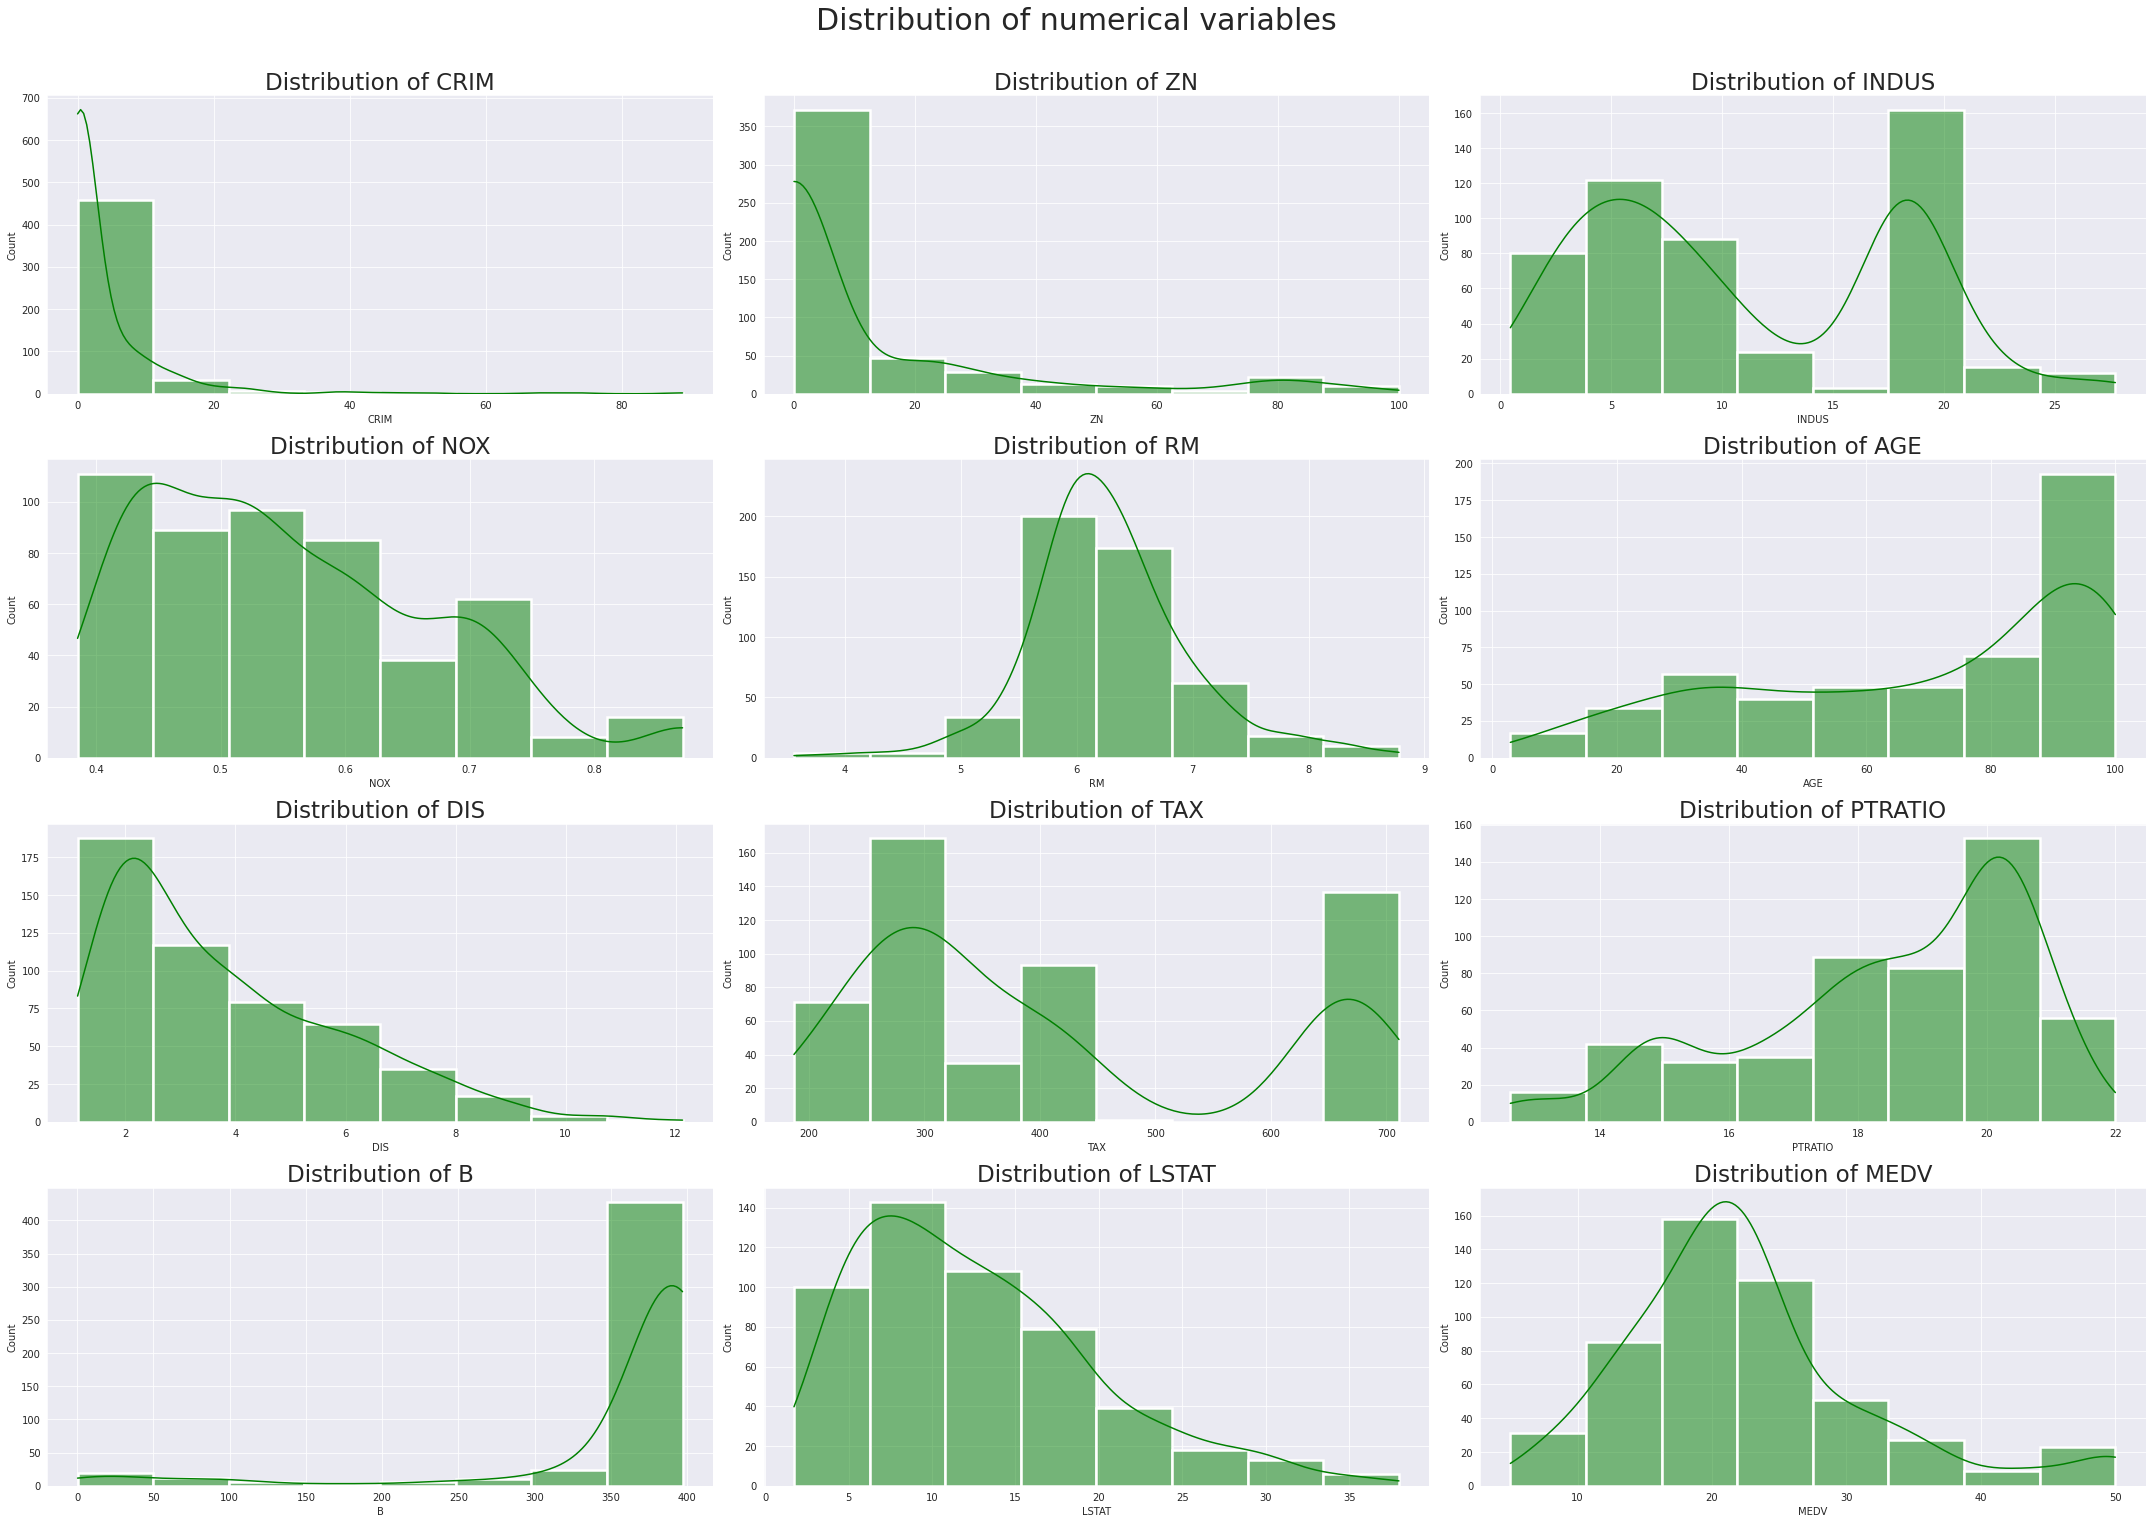

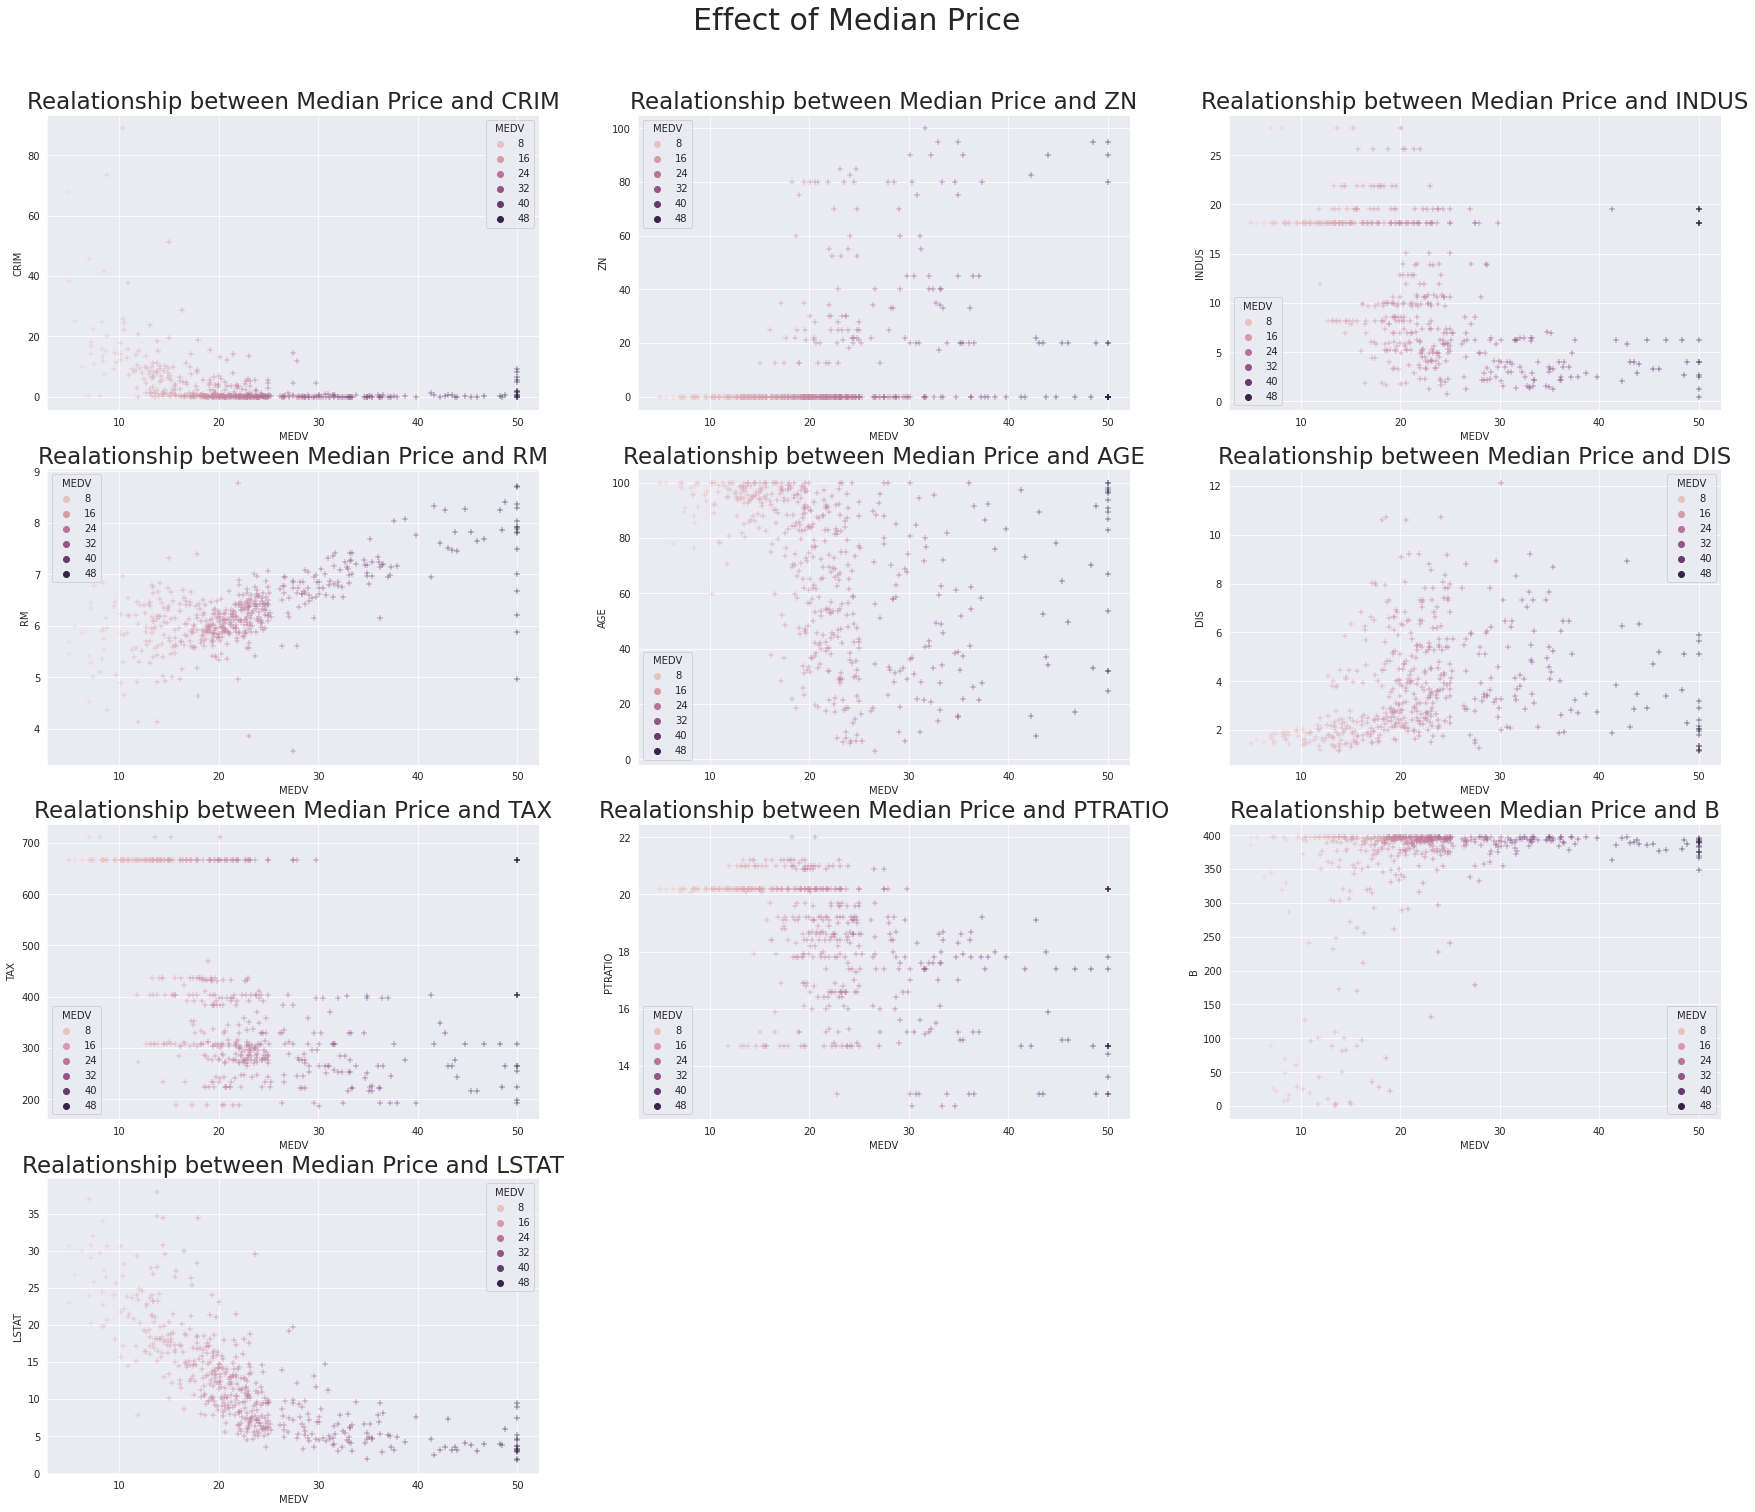

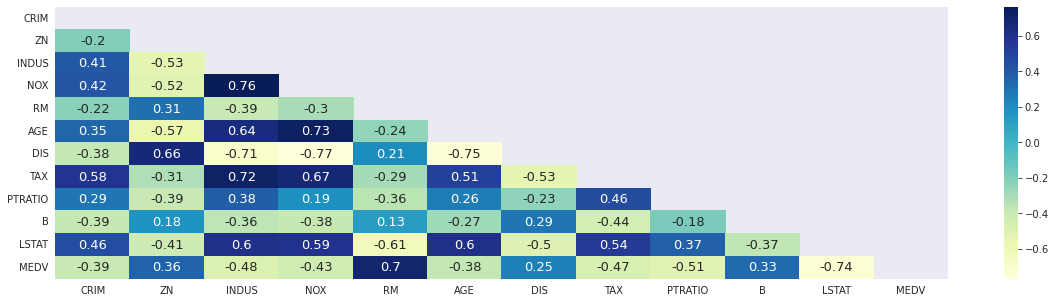

In [171]:
tansformation(housing_ol)

In [173]:
log_transformation(housing_ol)

/usr/local/lib/python3.7/dist-packages/pandas/core/arraylike.py:364: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [174]:
housing_ol

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,-5.064036,2.890372,0.837248,0,-0.619897,1.883275,4.177459,1.408545,1,5.690359,2.727853,5.983684,1.605430,3.178054
1,-3.600502,-inf,1.955860,0,-0.757153,1.859574,4.368181,1.602836,2,5.488938,2.879198,5.983684,2.212660,3.072693
2,-3.601235,-inf,1.955860,0,-0.757153,1.971996,4.112512,1.602836,2,5.488938,2.879198,5.973377,1.393766,3.546740
3,-3.430523,-inf,0.779325,0,-0.780886,1.945624,3.824284,1.802073,3,5.402677,2.928524,5.977949,1.078410,3.508556
4,-2.672924,-inf,0.779325,0,-0.780886,1.966693,3.992681,1.802073,3,5.402677,2.928524,5.983684,1.673351,3.589059
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,-2.770511,-inf,2.479056,0,-0.556870,1.886008,4.235555,0.907694,1,5.609472,3.044522,5.971236,2.269028,3.109061
502,-3.095111,-inf,2.479056,0,-0.556870,1.811562,4.339902,0.827460,1,5.609472,3.044522,5.983684,2.206074,3.025291
503,-2.800824,-inf,2.479056,0,-0.556870,1.942476,4.510860,0.773574,1,5.609472,3.044522,5.983684,1.729884,3.173878
504,-2.211009,-inf,2.479056,0,-0.556870,1.916040,4.492001,0.870833,1,5.609472,3.044522,5.974954,1.868721,3.091042


/usr/local/lib/python3.7/dist-packages/numpy/lib/function_base.py:4009: RuntimeWarning: invalid value encountered in subtract
  diff_b_a = subtract(b, a)


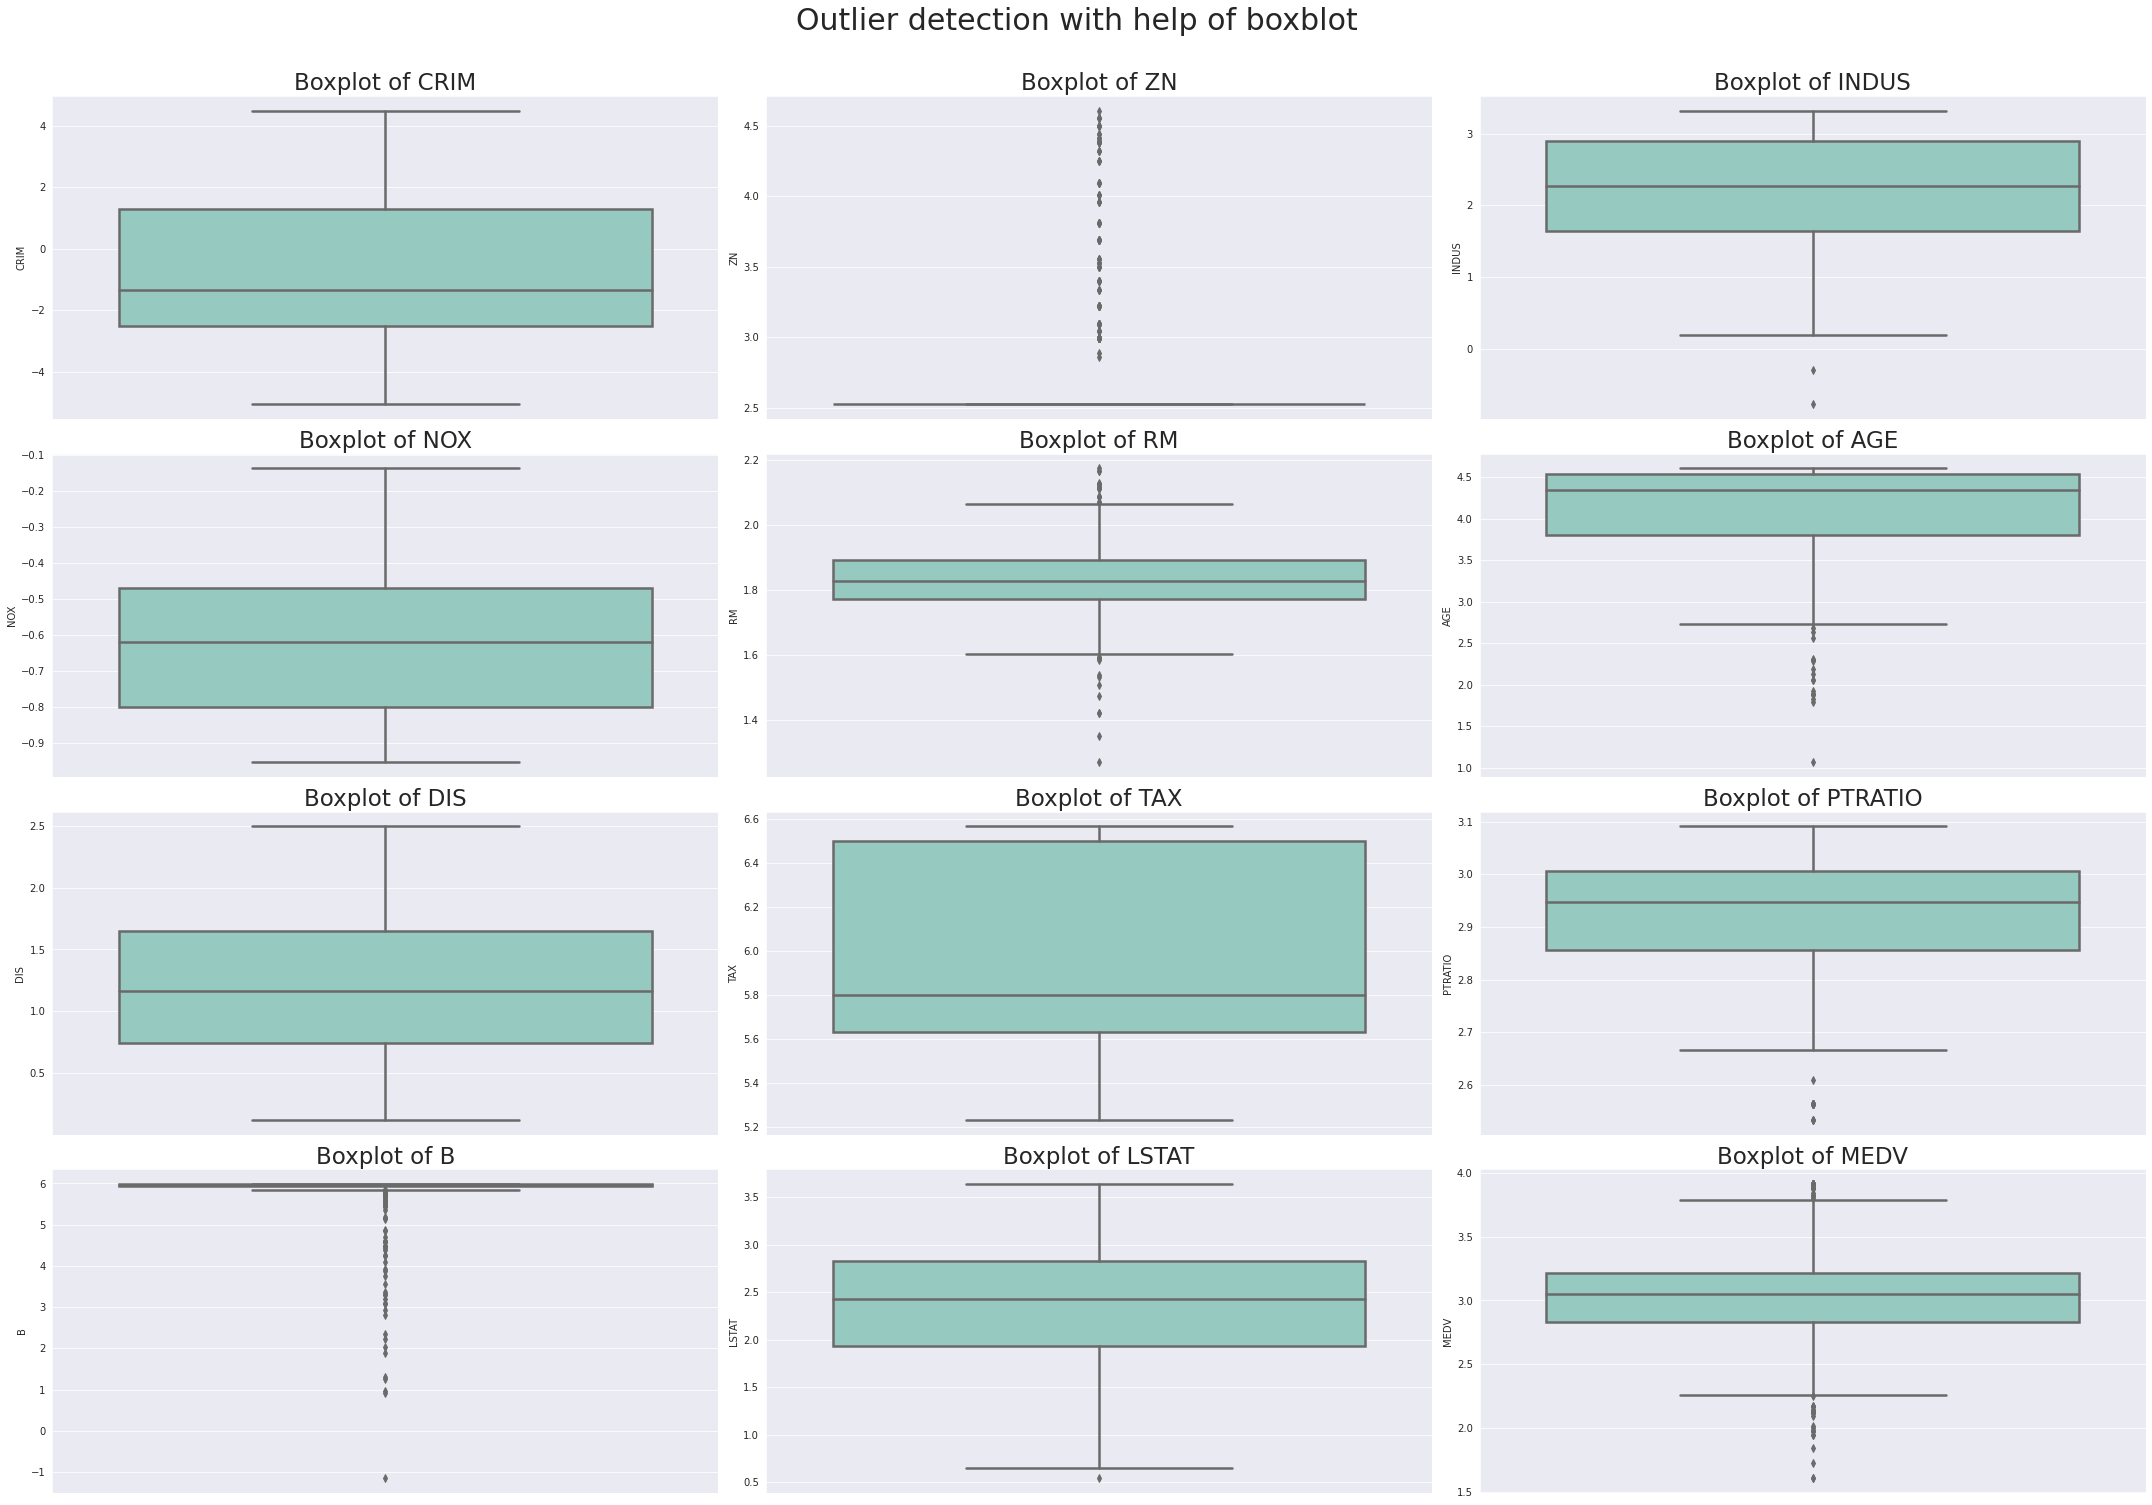

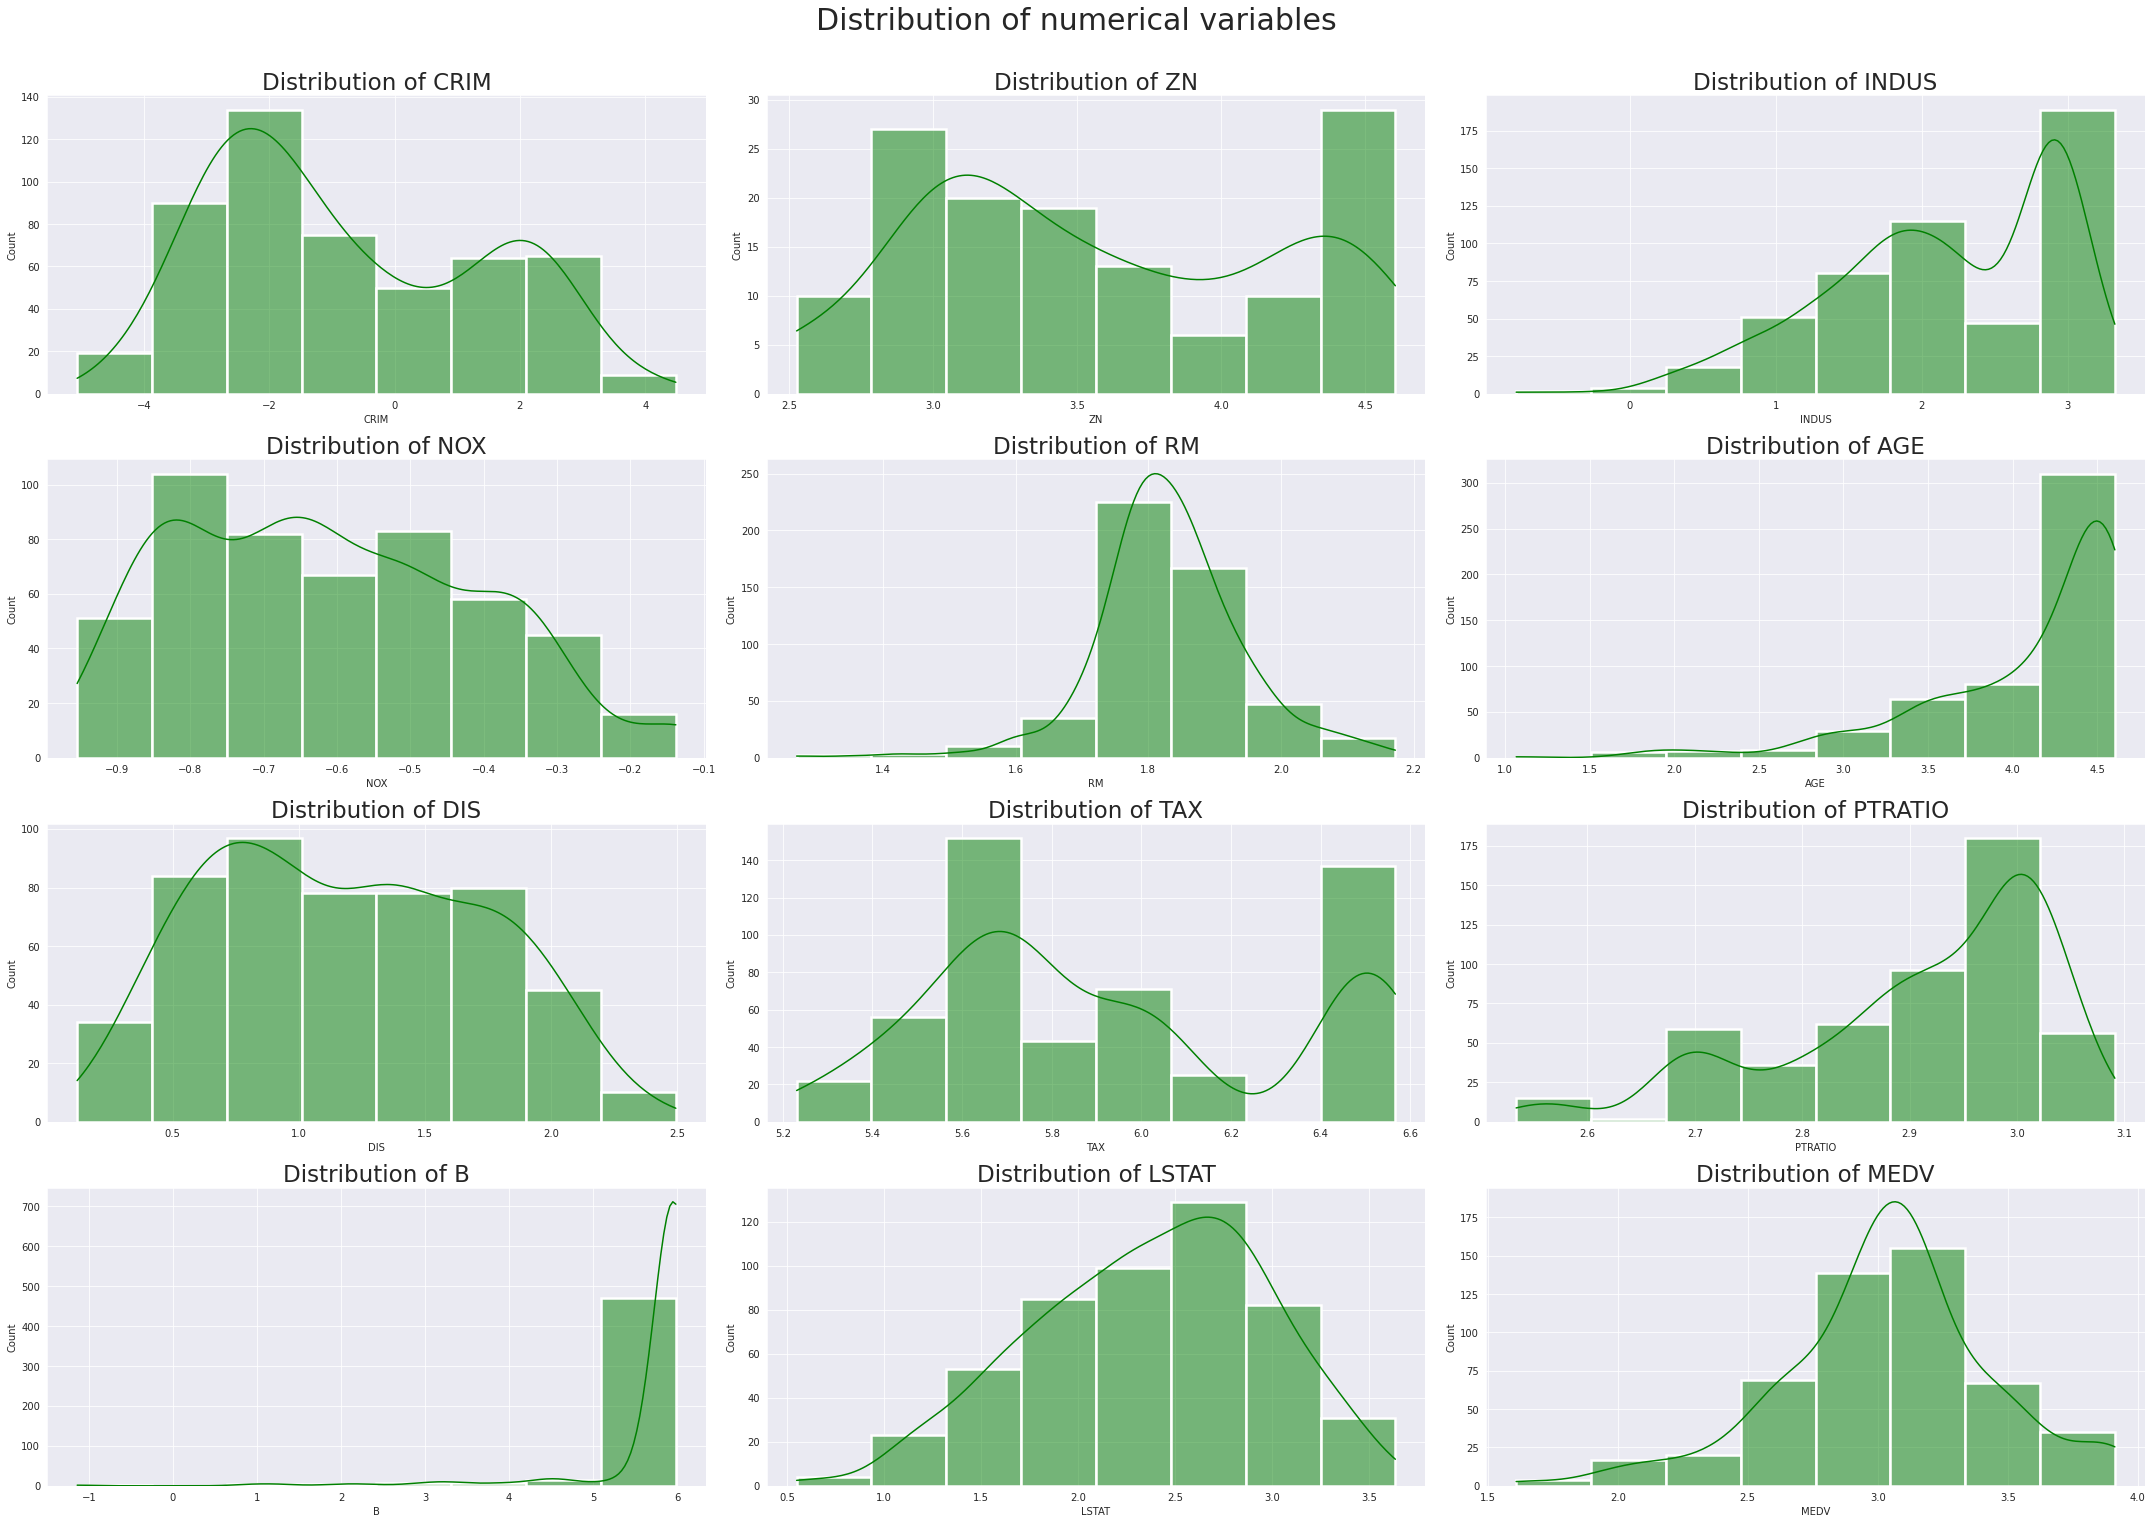

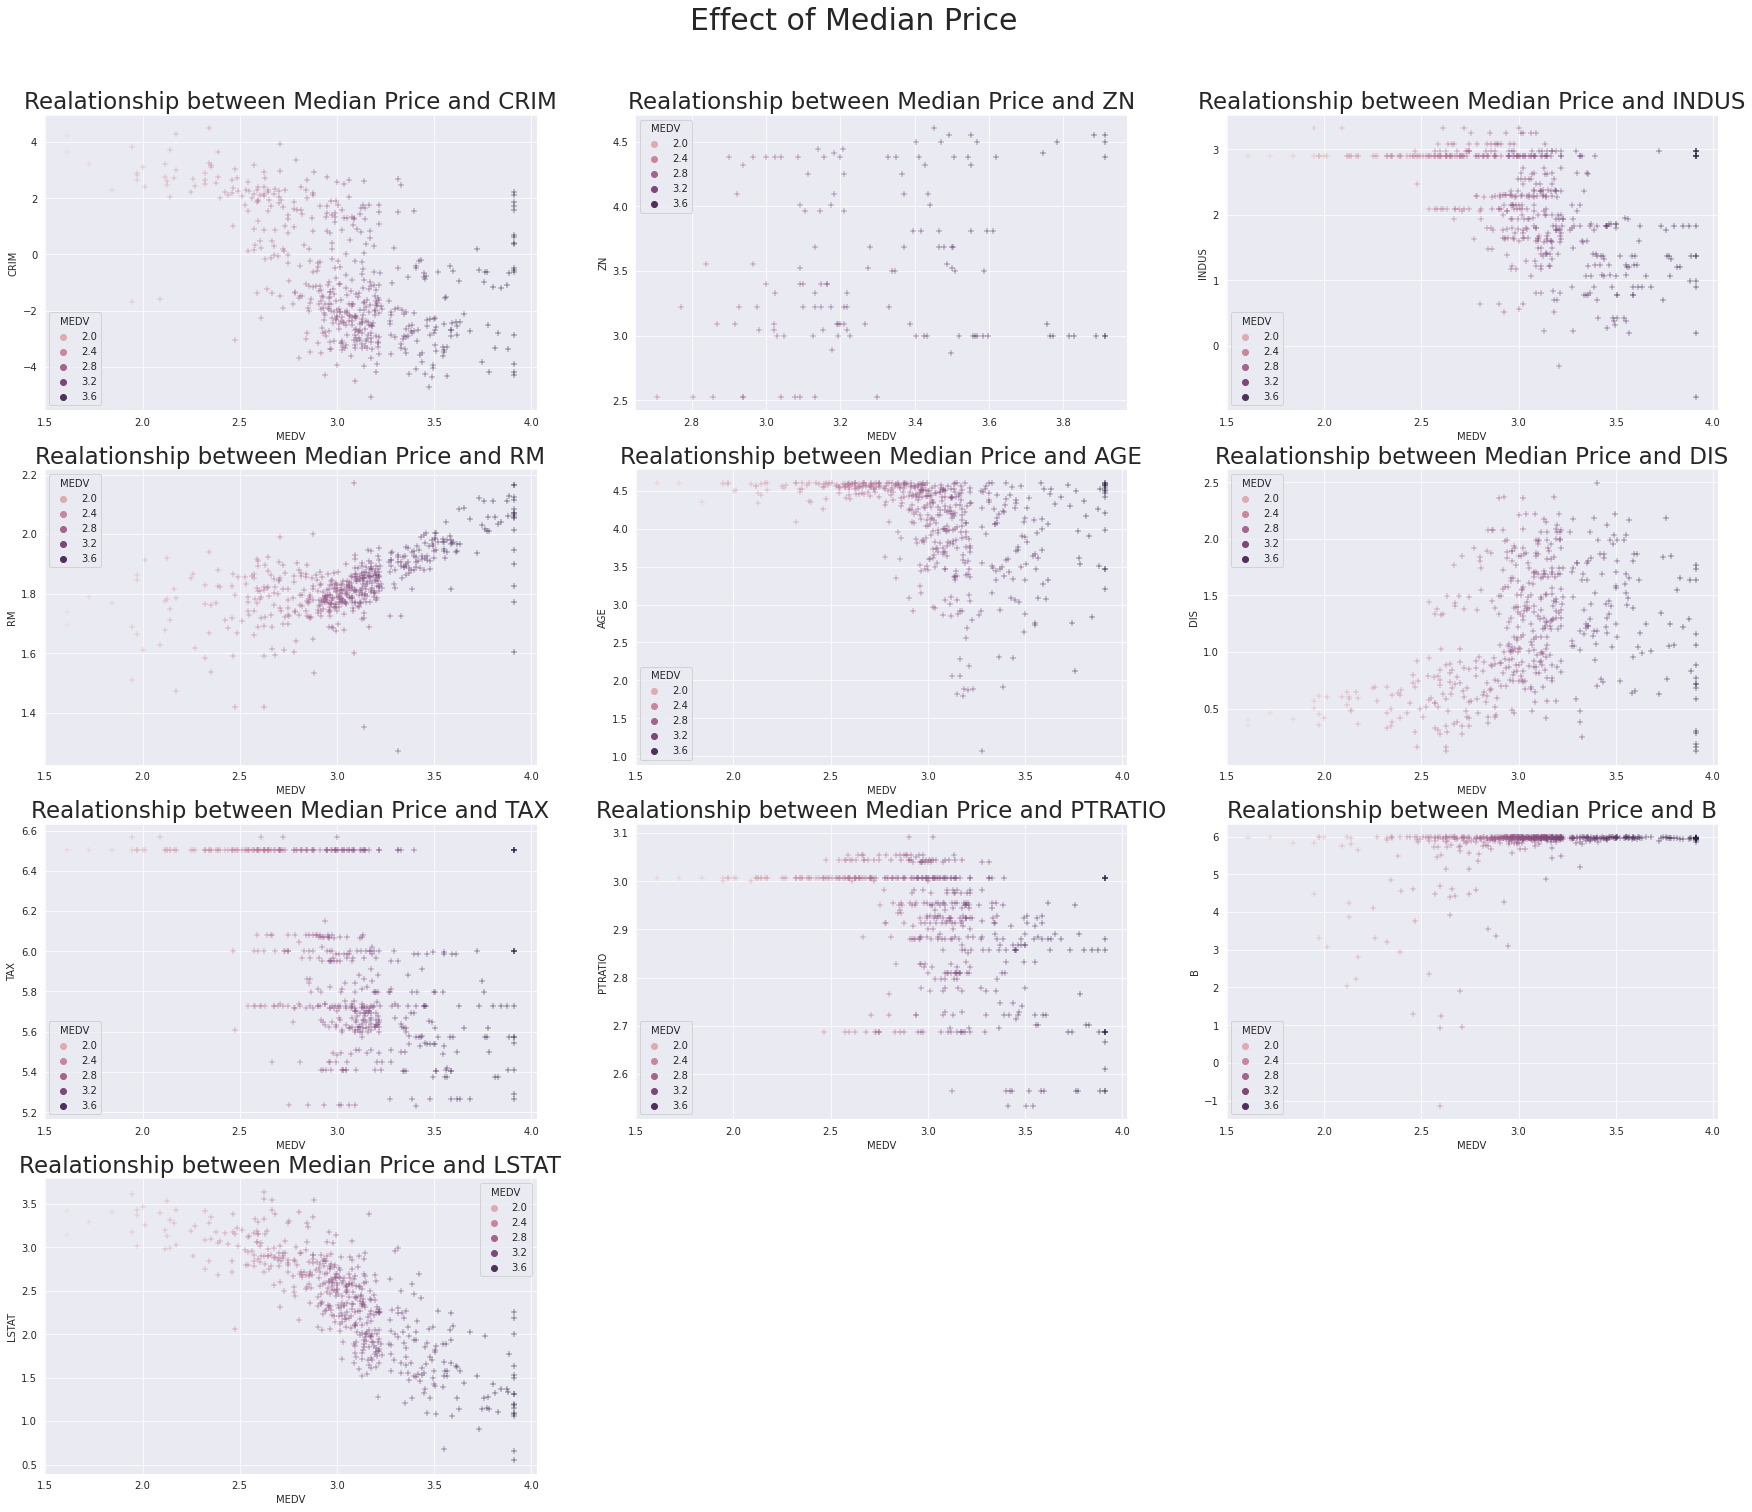

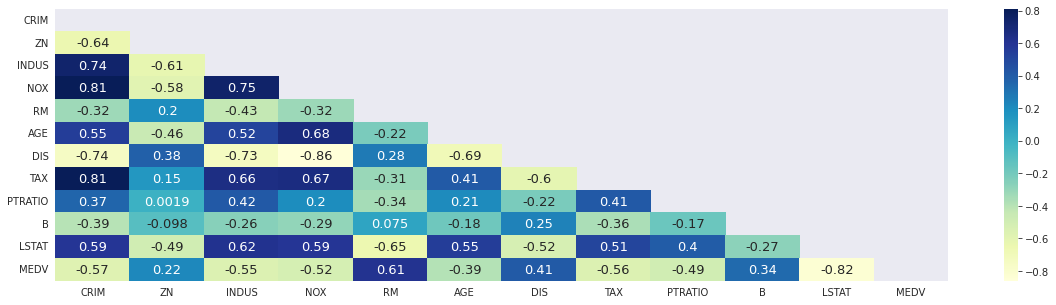

In [175]:
tansformation(housing_ol)